# Example 1: Sandstone Model

In [1]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib inline

geo_data = GeMpy.import_data([696000,747000,6863000,6950000,-20000, 2000],[ 40, 40, 40],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")

GeMpy.set_data_series(geo_data, {"EarlyGranite_Series":geo_data.formations[-1], 
                      "BIF_Series":(geo_data.formations[0], geo_data.formations[1]),
                      "SimpleMafic_Series":geo_data.formations[2]}, 
                       order_series = ["EarlyGranite_Series",
                              "BIF_Series",
                              "SimpleMafic_Series"], verbose=0)

In [18]:
#data_interp = GeMpy.select_series(geo_data, ["BIF_Series"])
data_interp = GeMpy.set_interpolator(geo_data, u_grade = 0, dtype="float32", verbose=[])

In [19]:
input_data_T = data_interp.interpolator.tg.input_parameters_list()
input_data_P = data_interp.interpolator.data_prep() 

In [20]:
data_interp.interpolator.tg.n_formation.get_value()
data_interp.interpolator.tg.n_formations_per_serie.get_value()

array([0, 1, 3, 4])

In [21]:
data_interp.interpolator._data_scaled.interfaces;

In [22]:
debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(), on_unused_input='ignore',
                         #   mode='DebugMode', 
                            allow_input_downcast=True, profile=True)

In [23]:
sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])


In [24]:
np.unique(sol)

array([0, 1, 2, 3, 4])

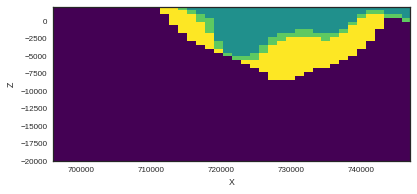

In [25]:
GeMpy.plot_section(geo_data, 13,  block = sol, direction='y', plot_data = False)

In [35]:
GeMpy.plot_section?

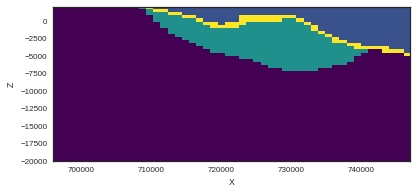

In [16]:
GeMpy.plot_section(geo_data, 13, block = sol, plot_data = False)

In [5]:
debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Value of the potential field at the interfaces __str__ = [ 0.10897]
Value of the potential field at the interfaces __str__ = [ 0.083977  0.079524]
Value of the potential field at the interfaces __str__ = [ 0.330928]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

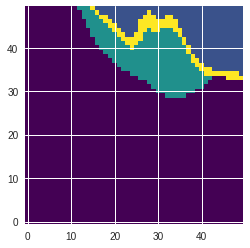

In [7]:
tp = sol[-1].reshape(50,50,50).T
plt.imshow(tp[:,13,:], origin='bottom', cmap='viridis', interpolation='None')

In [15]:
np.zeros((9,2), dtype='int').dtype

dtype('int64')

In [11]:
debugging.profile.summary()

Function profiling
  Message: <ipython-input-6-22dcf15bad61>:3
  Time in 5 calls to Function.__call__: 1.357155e+01s
  Time in Function.fn.__call__: 1.357096e+01s (99.996%)
  Time in thunks: 1.357014e+01s (99.990%)
  Total compile time: 2.592983e+01s
    Number of Apply nodes: 95
    Theano Optimizer time: 1.642699e+01s
       Theano validate time: 3.617525e-02s
    Theano Linker time (includes C, CUDA code generation/compiling): 9.462233e+00s
       Import time 1.913705e-01s
       Node make_thunk time 9.450990e+00s
           Node forall_inplace,cpu,scan_fn}(Elemwise{Maximum}[(0, 0)].0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, IncSubtensor{InplaceSet;:int64:}.0, grade of the universal drift, <TensorType(float64, matrix)>, <TensorType(float64, vector)>, Value of the formation, Position of the dips, Rest of the points of the layers, Reference 

In [1]:
GeMpy.set_interpolator(geo_data, u_grade = 0, compute_potential_field=True, verbose = 4)

                X             Y            Z     formation  \
0   735484.817806  6.891936e+06 -1819.319309  SimpleMafic2   
1   729854.915982  6.891938e+06 -1432.263309  SimpleMafic2   
2   724084.267161  6.891939e+06 -4739.830309  SimpleMafic2   
3   733521.625000  6.895282e+06   521.555240  SimpleMafic2   
4   721933.375000  6.884592e+06   496.669295  SimpleMafic2   
5   724251.000000  6.886909e+06   484.550926  SimpleMafic2   
6   727316.313000  6.886460e+06   478.254423  SimpleMafic2   
7   729858.250000  6.887134e+06   484.259574  SimpleMafic2   
8   732699.250000  6.885040e+06   494.526481  SimpleMafic2   
9   716849.500000  6.887358e+06   508.981894  SimpleMafic2   
10  719017.625000  6.892218e+06   508.179387  SimpleMafic2   
11  739179.440691  6.891936e+06  -552.591309     SimpleBIF   
12  735564.599804  6.891936e+06 -2652.196309     SimpleBIF   
13  730009.009977  6.891938e+06 -2088.409309     SimpleBIF   
14  718795.791326  6.891941e+06 -2773.169309     SimpleBIF   
15  7241

LinAlgError: Singular matrix
Apply node that caused the error: MatrixInverse(IncSubtensor{Set;int64:int64:, int64:int64:}.0)
Toposort index: 956
Inputs types: [TensorType(float64, matrix)]
Inputs shapes: [(30, 30)]
Inputs strides: [(240, 8)]
Inputs values: ['not shown']
Outputs clients: [[dot(MatrixInverse.0, IncSubtensor{Set;int64:int64:}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2831, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-d745299709ab>", line 39, in <module>
    GeMpy.set_interpolator(geo_data, u_grade = 0, compute_potential_field=True, verbose = 4)
  File "../GeMpy/GeMpy.py", line 225, in set_interpolator
    *args, **kwargs)
  File "../GeMpy/DataManagement.py", line 362, in __init__
    self.tg = theanograf.TheanoGraph(u_grade)
  File "../GeMpy/theanograf.py", line 410, in __init__
    self.DK_parameters = T.dot(T.nlinalg.matrix_inverse(C_matrix), b)

Debugprint of the apply node: 
MatrixInverse [id A] <TensorType(float64, matrix)> ''   
 |IncSubtensor{Set;int64:int64:, int64:int64:} [id B] <TensorType(float64, matrix)> ''   
   |IncSubtensor{Set;int64:int64:, int64:int64:} [id C] <TensorType(float64, matrix)> ''   
   | |IncSubtensor{Set;int64:int64:, int64:int64:} [id D] <TensorType(float64, matrix)> ''   
   | | |IncSubtensor{Set;int64:int64:, int64:int64:} [id E] <TensorType(float64, matrix)> ''   
   | | | |Alloc [id F] <TensorType(float64, matrix)> ''   
   | | | | |TensorConstant{0.0} [id G] <TensorType(float64, scalar)>
   | | | | |Elemwise{add,no_inplace} [id H] <TensorType(int64, scalar)> ''   
   | | | | | |Elemwise{add,no_inplace} [id I] <TensorType(int64, scalar)> ''   
   | | | | | | |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   | | | | | | | |Subtensor{int64} [id K] <TensorType(int64, scalar)> ''   
   | | | | | | | | |Shape [id L] <TensorType(int64, vector)> ''   
   | | | | | | | | | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | | | | | |Constant{0} [id N] <int64>
   | | | | | | | |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | | | |Subtensor{int64} [id P] <TensorType(int64, scalar)> ''   
   | | | | | |   |Shape [id Q] <TensorType(int64, vector)> ''   
   | | | | | |   | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | | | | |   |Constant{0} [id S] <int64>
   | | | | | |grade of the universal drift [id T] <TensorType(int64, scalar)>
   | | | | |Elemwise{add,no_inplace} [id H] <TensorType(int64, scalar)> ''   
   | | | |FillDiagonal [id U] <TensorType(float64, matrix)> ''   
   | | | | |Elemwise{switch,no_inplace} [id V] <TensorType(float64, matrix)> ''   
   | | | | | |Elemwise{eq,no_inplace} [id W] <TensorType(int8, matrix)> ''   
   | | | | | | |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | | | | |Elemwise{eq,no_inplace} [id Y] <TensorType(int8, matrix)> ''   
   | | | | | | | | |Elemwise{Cast{float32}} [id Z] <TensorType(float32, matrix)> ''   
   | | | | | | | | | |Elemwise{sqrt,no_inplace} [id BA] <TensorType(float64, matrix)> ''   
   | | | | | | | | |   |Elemwise{sub,no_inplace} [id BB] <TensorType(float64, matrix)> ''   
   | | | | | | | | |     |Elemwise{add,no_inplace} [id BC] <TensorType(float64, matrix)> ''   
   | | | | | | | | |     | |Reshape{2} [id BD] <TensorType(float64, col)> ''   
   | | | | | | | | |     | | |Sum{axis=[1], acc_dtype=float64} [id BE] <TensorType(float64, vector)> ''   
   | | | | | | | | |     | | | |Elemwise{pow,no_inplace} [id BF] <TensorType(float64, matrix)> ''   
   | | | | | | | | |     | | |   |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | | | | | | | |     | | |   | |DimShuffle{0,2,1,3} [id BH] <TensorType(float64, (False, False, True, False))> ''   
   | | | | | | | | |     | | |   | | |Alloc [id BI] <TensorType(float64, (False, True, False, False))> ''   
   | | | | | | | | |     | | |   | |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | | | | | |     | | |   | |   |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | | | | | |     | | |   | |   |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | | | | | |     | | |   | |   |Subtensor{int64} [id BK] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     | | |   | |   | |Shape [id BL] <TensorType(int64, vector)> ''   
   | | | | | | | | |     | | |   | |   | | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | | | | | |     | | |   | |   | |Constant{0} [id BM] <int64>
   | | | | | | | | |     | | |   | |   |Subtensor{int64} [id BN] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     | | |   | |     |Shape [id BO] <TensorType(int64, vector)> ''   
   | | | | | | | | |     | | |   | |     | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | | | | | |     | | |   | |     |Constant{1} [id BP] <int64>
   | | | | | | | | |     | | |   | |MakeVector{dtype='int64'} [id BQ] <TensorType(int64, vector)> ''   
   | | | | | | | | |     | | |   |   |Elemwise{mul,no_inplace} [id BR] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     | | |   |   | |Subtensor{int64} [id BK] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     | | |   |   | |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | | | | | |     | | |   |   |Elemwise{mul,no_inplace} [id BS] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     | | |   |     |Subtensor{int64} [id BN] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     | | |   |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | | | | | |     | | |   |DimShuffle{x,x} [id BT] <TensorType(int8, (True, True))> ''   
   | | | | | | | | |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | | | | | |     | | |MakeVector{dtype='int64'} [id BV] <TensorType(int64, vector)> ''   
   | | | | | | | | |     | |   |Subtensor{int64} [id BW] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     | |   | |Shape [id BX] <TensorType(int64, vector)> ''   
   | | | | | | | | |     | |   | | |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | | | | | | | |     | |   | |Constant{0} [id BY] <int64>
   | | | | | | | | |     | |   |Elemwise{Cast{int64}} [id BZ] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     | |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | | | | | |     | |Reshape{2} [id CA] <TensorType(float64, row)> ''   
   | | | | | | | | |     |   |Sum{axis=[1], acc_dtype=float64} [id CB] <TensorType(float64, vector)> ''   
   | | | | | | | | |     |   | |Elemwise{pow,no_inplace} [id CC] <TensorType(float64, matrix)> ''   
   | | | | | | | | |     |   |   |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | | | | | | | |     |   |   |DimShuffle{x,x} [id CD] <TensorType(int8, (True, True))> ''   
   | | | | | | | | |     |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | | | | | |     |   |MakeVector{dtype='int64'} [id CE] <TensorType(int64, vector)> ''   
   | | | | | | | | |     |     |Elemwise{Cast{int64}} [id CF] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     |     | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | | | | | |     |     |Subtensor{int64} [id CG] <TensorType(int64, scalar)> ''   
   | | | | | | | | |     |       |Shape [id CH] <TensorType(int64, vector)> ''   
   | | | | | | | | |     |       | |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | | | | | | | |     |       |Constant{0} [id CI] <int64>
   | | | | | | | | |     |Elemwise{mul,no_inplace} [id CJ] <TensorType(float64, matrix)> ''   
   | | | | | | | | |       |DimShuffle{x,x} [id CK] <TensorType(int8, (True, True))> ''   
   | | | | | | | | |       | |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | | | | | |       |dot [id CL] <TensorType(float64, matrix)> ''   
   | | | | | | | | |         |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | | | | | | | |         |DimShuffle{1,0} [id CM] <TensorType(float64, matrix)> ''   
   | | | | | | | | |           |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | | | | | | | |DimShuffle{x,x} [id CN] <TensorType(int8, (True, True))> ''   
   | | | | | | | |   |TensorConstant{0} [id CO] <TensorType(int8, scalar)>
   | | | | | | | |DimShuffle{x,x} [id CP] <TensorType(int8, (True, True))> ''   
   | | | | | | | | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | | | | |Elemwise{Cast{float32}} [id Z] <TensorType(float32, matrix)> ''   
   | | | | | | |DimShuffle{x,x} [id CQ] <TensorType(int8, (True, True))> ''   
   | | | | | |   |TensorConstant{0} [id CO] <TensorType(int8, scalar)>
   | | | | | |DimShuffle{x,x} [id CR] <TensorType(int8, (True, True))> ''   
   | | | | | | |TensorConstant{0} [id CO] <TensorType(int8, scalar)>
   | | | | | |Elemwise{sub,no_inplace} [id CS] <TensorType(float64, matrix)> ''   
   | | | | |   |Elemwise{mul,no_inplace} [id CT] <TensorType(float64, matrix)> ''   
   | | | | |   | |Elemwise{true_div,no_inplace} [id CU] <TensorType(float64, matrix)> ''   
   | | | | |   | | |Elemwise{mul,no_inplace} [id CV] <TensorType(float64, matrix)> ''   
   | | | | |   | | | |Join [id CW] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | |TensorConstant{0} [id CO] <TensorType(int8, scalar)>
   | | | | |   | | | | |Reshape{2} [id CX] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | | |DimShuffle{0,2,1,3} [id CY] <TensorType(float64, (True, False, False, False))> ''   
   | | | | |   | | | | | | |Alloc [id CZ] <TensorType(float64, (True, False, False, False))> ''   
   | | | | |   | | | | | |   |Elemwise{sub,no_inplace} [id DA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | | |   | |DimShuffle{x,0} [id DB] <TensorType(float64, row)> ''   
   | | | | |   | | | | | |   | | |Subtensor{::, int64} [id DC] <TensorType(float64, vector)> ''   
   | | | | |   | | | | | |   | |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | | | |   | |   |Constant{0} [id DD] <int64>
   | | | | |   | | | | | |   | |Reshape{2} [id DE] <TensorType(float64, col)> ''   
   | | | | |   | | | | | |   |   |Subtensor{::, int64} [id DF] <TensorType(float64, vector)> ''   
   | | | | |   | | | | | |   |   | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | | | |   |   | |Constant{0} [id DG] <int64>
   | | | | |   | | | | | |   |   |MakeVector{dtype='int64'} [id DH] <TensorType(int64, vector)> ''   
   | | | | |   | | | | | |   |     |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | | |   |     | |Shape [id DJ] <TensorType(int64, vector)> ''   
   | | | | |   | | | | | |   |     | | |Subtensor{::, int64} [id DK] <TensorType(float64, vector)> ''   
   | | | | |   | | | | | |   |     | |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | | | |   |     | |   |Constant{0} [id DL] <int64>
   | | | | |   | | | | | |   |     | |Constant{0} [id DM] <int64>
   | | | | |   | | | | | |   |     |Elemwise{Cast{int64}} [id DN] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | | |   |       |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | | | |   |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | | | |   |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   | | | | | |   |Subtensor{int64} [id DO] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | | |   | |Shape [id DP] <TensorType(int64, vector)> ''   
   | | | | |   | | | | | |   | | |Elemwise{sub,no_inplace} [id DA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | | |   | |Constant{0} [id DQ] <int64>
   | | | | |   | | | | | |   |Subtensor{int64} [id DR] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | | |     |Shape [id DS] <TensorType(int64, vector)> ''   
   | | | | |   | | | | | |     | |Elemwise{sub,no_inplace} [id DA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | | |     |Constant{1} [id DT] <int64>
   | | | | |   | | | | | |MakeVector{dtype='int64'} [id DU] <TensorType(int64, vector)> ''   
   | | | | |   | | | | |   |Elemwise{mul,no_inplace} [id DV] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | |   | |Subtensor{int64} [id DO] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | |   | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | | |   |Elemwise{mul,no_inplace} [id DW] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | |     |Subtensor{int64} [id DR] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | |     |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   | | | | |Reshape{2} [id DX] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | | |DimShuffle{0,2,1,3} [id DY] <TensorType(float64, (True, False, False, False))> ''   
   | | | | |   | | | | | | |Alloc [id DZ] <TensorType(float64, (True, False, False, False))> ''   
   | | | | |   | | | | | |   |Elemwise{sub,no_inplace} [id EA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | | |   | |DimShuffle{x,0} [id EB] <TensorType(float64, row)> ''   
   | | | | |   | | | | | |   | | |Subtensor{::, int64} [id EC] <TensorType(float64, vector)> ''   
   | | | | |   | | | | | |   | |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | | | |   | |   |Constant{1} [id ED] <int64>
   | | | | |   | | | | | |   | |Reshape{2} [id EE] <TensorType(float64, col)> ''   
   | | | | |   | | | | | |   |   |Subtensor{::, int64} [id EF] <TensorType(float64, vector)> ''   
   | | | | |   | | | | | |   |   | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | | | |   |   | |Constant{1} [id EG] <int64>
   | | | | |   | | | | | |   |   |MakeVector{dtype='int64'} [id EH] <TensorType(int64, vector)> ''   
   | | | | |   | | | | | |   |     |Subtensor{int64} [id EI] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | | |   |     | |Shape [id EJ] <TensorType(int64, vector)> ''   
   | | | | |   | | | | | |   |     | | |Subtensor{::, int64} [id EK] <TensorType(float64, vector)> ''   
   | | | | |   | | | | | |   |     | |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | | | |   |     | |   |Constant{1} [id EL] <int64>
   | | | | |   | | | | | |   |     | |Constant{0} [id EM] <int64>
   | | | | |   | | | | | |   |     |Elemwise{Cast{int64}} [id EN] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | | |   |       |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | | | |   |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | | | |   |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   | | | | | |   |Subtensor{int64} [id EO] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | | |   | |Shape [id EP] <TensorType(int64, vector)> ''   
   | | | | |   | | | | | |   | | |Elemwise{sub,no_inplace} [id EA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | | |   | |Constant{0} [id EQ] <int64>
   | | | | |   | | | | | |   |Subtensor{int64} [id ER] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | | |     |Shape [id ES] <TensorType(int64, vector)> ''   
   | | | | |   | | | | | |     | |Elemwise{sub,no_inplace} [id EA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | | | |     |Constant{1} [id ET] <int64>
   | | | | |   | | | | | |MakeVector{dtype='int64'} [id EU] <TensorType(int64, vector)> ''   
   | | | | |   | | | | |   |Elemwise{mul,no_inplace} [id EV] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | |   | |Subtensor{int64} [id EO] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | |   | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | | |   |Elemwise{mul,no_inplace} [id EW] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | |     |Subtensor{int64} [id ER] <TensorType(int64, scalar)> ''   
   | | | | |   | | | | |     |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   | | | | |Reshape{2} [id EX] <TensorType(float64, matrix)> ''   
   | | | | |   | | | |   |DimShuffle{0,2,1,3} [id EY] <TensorType(float64, (True, False, False, False))> ''   
   | | | | |   | | | |   | |Alloc [id EZ] <TensorType(float64, (True, False, False, False))> ''   
   | | | | |   | | | |   |   |Elemwise{sub,no_inplace} [id FA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | |   |   | |DimShuffle{x,0} [id FB] <TensorType(float64, row)> ''   
   | | | | |   | | | |   |   | | |Subtensor{::, int64} [id FC] <TensorType(float64, vector)> ''   
   | | | | |   | | | |   |   | |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | |   |   | |   |Constant{2} [id FD] <int64>
   | | | | |   | | | |   |   | |Reshape{2} [id FE] <TensorType(float64, col)> ''   
   | | | | |   | | | |   |   |   |Subtensor{::, int64} [id FF] <TensorType(float64, vector)> ''   
   | | | | |   | | | |   |   |   | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | |   |   |   | |Constant{2} [id FG] <int64>
   | | | | |   | | | |   |   |   |MakeVector{dtype='int64'} [id FH] <TensorType(int64, vector)> ''   
   | | | | |   | | | |   |   |     |Subtensor{int64} [id FI] <TensorType(int64, scalar)> ''   
   | | | | |   | | | |   |   |     | |Shape [id FJ] <TensorType(int64, vector)> ''   
   | | | | |   | | | |   |   |     | | |Subtensor{::, int64} [id FK] <TensorType(float64, vector)> ''   
   | | | | |   | | | |   |   |     | |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |   | | | |   |   |     | |   |Constant{2} [id FL] <int64>
   | | | | |   | | | |   |   |     | |Constant{0} [id FM] <int64>
   | | | | |   | | | |   |   |     |Elemwise{Cast{int64}} [id FN] <TensorType(int64, scalar)> ''   
   | | | | |   | | | |   |   |       |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | |   |   |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | |   |   |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   | | | |   |   |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
   | | | | |   | | | |   |   | |Shape [id FP] <TensorType(int64, vector)> ''   
   | | | | |   | | | |   |   | | |Elemwise{sub,no_inplace} [id FA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | |   |   | |Constant{0} [id FQ] <int64>
   | | | | |   | | | |   |   |Subtensor{int64} [id FR] <TensorType(int64, scalar)> ''   
   | | | | |   | | | |   |     |Shape [id FS] <TensorType(int64, vector)> ''   
   | | | | |   | | | |   |     | |Elemwise{sub,no_inplace} [id FA] <TensorType(float64, matrix)> ''   
   | | | | |   | | | |   |     |Constant{1} [id FT] <int64>
   | | | | |   | | | |   |MakeVector{dtype='int64'} [id FU] <TensorType(int64, vector)> ''   
   | | | | |   | | | |     |Elemwise{mul,no_inplace} [id FV] <TensorType(int64, scalar)> ''   
   | | | | |   | | | |     | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
   | | | | |   | | | |     | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |   | | | |     |Elemwise{mul,no_inplace} [id FW] <TensorType(int64, scalar)> ''   
   | | | | |   | | | |       |Subtensor{int64} [id FR] <TensorType(int64, scalar)> ''   
   | | | | |   | | | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   | | | |DimShuffle{1,0} [id FX] <TensorType(float64, matrix)> ''   
   | | | | |   | | |   |Join [id CW] <TensorType(float64, matrix)> ''   
   | | | | |   | | |Elemwise{pow,no_inplace} [id FY] <TensorType(float32, matrix)> ''   
   | | | | |   | |   |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   | |   |DimShuffle{x,x} [id FZ] <TensorType(int8, (True, True))> ''   
   | | | | |   | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |   | |Elemwise{add,no_inplace} [id GA] <TensorType(float64, matrix)> ''   
   | | | | |   |   |Elemwise{mul,no_inplace} [id GB] <TensorType(float64, matrix)> ''   
   | | | | |   |   | |Elemwise{lt,no_inplace} [id GC] <TensorType(int8, matrix)> ''   
   | | | | |   |   | | |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   |   | | |DimShuffle{x,x} [id GD] <TensorType(int64, (True, True))> ''   
   | | | | |   |   | |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |   | |Elemwise{mul,no_inplace} [id GF] <TensorType(float64, matrix)> ''   
   | | | | |   |   |   |DimShuffle{x,x} [id GG] <TensorType(int64, (True, True))> ''   
   | | | | |   |   |   | |Elemwise{neg,no_inplace} [id GH] <TensorType(int64, scalar)> ''   
   | | | | |   |   |   |   |<TensorType(int64, scalar)> [id GI] <TensorType(int64, scalar)>
   | | | | |   |   |   |Elemwise{add,no_inplace} [id GJ] <TensorType(float64, matrix)> ''   
   | | | | |   |   |     |Elemwise{sub,no_inplace} [id GK] <TensorType(float64, matrix)> ''   
   | | | | |   |   |     | |Elemwise{add,no_inplace} [id GL] <TensorType(float64, matrix)> ''   
   | | | | |   |   |     | | |DimShuffle{x,x} [id GM] <TensorType(float64, (True, True))> ''   
   | | | | |   |   |     | | | |Elemwise{true_div,no_inplace} [id GN] <TensorType(float64, scalar)> ''   
   | | | | |   |   |     | | |   |TensorConstant{-14} [id GO] <TensorType(int8, scalar)>
   | | | | |   |   |     | | |   |Elemwise{pow,no_inplace} [id GP] <TensorType(int64, scalar)> ''   
   | | | | |   |   |     | | |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |   |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |   |   |     | | |Elemwise{true_div,no_inplace} [id GQ] <TensorType(float64, matrix)> ''   
   | | | | |   |   |     | |   |Elemwise{mul,no_inplace} [id GR] <TensorType(float32, matrix)> ''   
   | | | | |   |   |     | |   | |DimShuffle{x,x} [id GS] <TensorType(float32, (True, True))> ''   
   | | | | |   |   |     | |   | | |TensorConstant{26.25} [id GT] <TensorType(float32, scalar)>
   | | | | |   |   |     | |   | |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   |   |     | |   |DimShuffle{x,x} [id GU] <TensorType(int64, (True, True))> ''   
   | | | | |   |   |     | |     |Elemwise{pow,no_inplace} [id GV] <TensorType(int64, scalar)> ''   
   | | | | |   |   |     | |       |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |   |     | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   |   |     | |Elemwise{true_div,no_inplace} [id GW] <TensorType(float64, matrix)> ''   
   | | | | |   |   |     |   |Elemwise{mul,no_inplace} [id GX] <TensorType(float32, matrix)> ''   
   | | | | |   |   |     |   | |DimShuffle{x,x} [id GY] <TensorType(float32, (True, True))> ''   
   | | | | |   |   |     |   | | |TensorConstant{17.5} [id GZ] <TensorType(float32, scalar)>
   | | | | |   |   |     |   | |Elemwise{pow,no_inplace} [id HA] <TensorType(float32, matrix)> ''   
   | | | | |   |   |     |   |   |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   |   |     |   |   |DimShuffle{x,x} [id HB] <TensorType(int8, (True, True))> ''   
   | | | | |   |   |     |   |     |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   |   |     |   |DimShuffle{x,x} [id HC] <TensorType(int64, (True, True))> ''   
   | | | | |   |   |     |     |Elemwise{pow,no_inplace} [id HD] <TensorType(int64, scalar)> ''   
   | | | | |   |   |     |       |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |   |     |       |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | | | |   |   |     |Elemwise{true_div,no_inplace} [id HF] <TensorType(float64, matrix)> ''   
   | | | | |   |   |       |Elemwise{mul,no_inplace} [id HG] <TensorType(float32, matrix)> ''   
   | | | | |   |   |       | |DimShuffle{x,x} [id HH] <TensorType(float32, (True, True))> ''   
   | | | | |   |   |       | | |TensorConstant{5.25} [id HI] <TensorType(float32, scalar)>
   | | | | |   |   |       | |Elemwise{pow,no_inplace} [id HJ] <TensorType(float32, matrix)> ''   
   | | | | |   |   |       |   |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   |   |       |   |DimShuffle{x,x} [id HK] <TensorType(int8, (True, True))> ''   
   | | | | |   |   |       |     |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | | | |   |   |       |DimShuffle{x,x} [id HL] <TensorType(int64, (True, True))> ''   
   | | | | |   |   |         |Elemwise{pow,no_inplace} [id HM] <TensorType(int64, scalar)> ''   
   | | | | |   |   |           |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |   |           |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   | | | | |   |   |Elemwise{true_div,no_inplace} [id HO] <TensorType(float64, matrix)> ''   
   | | | | |   |     |Elemwise{mul,no_inplace} [id HP] <TensorType(float64, matrix)> ''   
   | | | | |   |     | |Elemwise{mul,no_inplace} [id HQ] <TensorType(int64, matrix)> ''   
   | | | | |   |     | | |Elemwise{mul,no_inplace} [id HR] <TensorType(int64, matrix)> ''   
   | | | | |   |     | | | |Elemwise{lt,no_inplace} [id HS] <TensorType(int8, matrix)> ''   
   | | | | |   |     | | | | |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   |     | | | | |DimShuffle{x,x} [id HT] <TensorType(int64, (True, True))> ''   
   | | | | |   |     | | | |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |     | | | |DimShuffle{x,x} [id HU] <TensorType(int64, (True, True))> ''   
   | | | | |   |     | | |   |<TensorType(int64, scalar)> [id GI] <TensorType(int64, scalar)>
   | | | | |   |     | | |DimShuffle{x,x} [id HV] <TensorType(int8, (True, True))> ''   
   | | | | |   |     | |   |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   | | | | |   |     | |Elemwise{sub,no_inplace} [id HW] <TensorType(float64, matrix)> ''   
   | | | | |   |     |   |Elemwise{add,no_inplace} [id HX] <TensorType(float64, matrix)> ''   
   | | | | |   |     |   | |Elemwise{sub,no_inplace} [id HY] <TensorType(float64, matrix)> ''   
   | | | | |   |     |   | | |Elemwise{mul,no_inplace} [id HZ] <TensorType(float32, matrix)> ''   
   | | | | |   |     |   | | | |DimShuffle{x,x} [id IA] <TensorType(int8, (True, True))> ''   
   | | | | |   |     |   | | | | |TensorConstant{9} [id IB] <TensorType(int8, scalar)>
   | | | | |   |     |   | | | |Elemwise{pow,no_inplace} [id IC] <TensorType(float32, matrix)> ''   
   | | | | |   |     |   | | |   |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   |     |   | | |   |DimShuffle{x,x} [id ID] <TensorType(int8, (True, True))> ''   
   | | | | |   |     |   | | |     |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | | | |   |     |   | | |Elemwise{mul,no_inplace} [id IE] <TensorType(float64, matrix)> ''   
   | | | | |   |     |   | |   |DimShuffle{x,x} [id IF] <TensorType(int64, (True, True))> ''   
   | | | | |   |     |   | |   | |Elemwise{mul,no_inplace} [id IG] <TensorType(int64, scalar)> ''   
   | | | | |   |     |   | |   |   |TensorConstant{20} [id IH] <TensorType(int8, scalar)>
   | | | | |   |     |   | |   |   |Elemwise{pow,no_inplace} [id II] <TensorType(int64, scalar)> ''   
   | | | | |   |     |   | |   |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |     |   | |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |   |     |   | |   |Elemwise{pow,no_inplace} [id IJ] <TensorType(float32, matrix)> ''   
   | | | | |   |     |   | |     |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   |     |   | |     |DimShuffle{x,x} [id IK] <TensorType(int8, (True, True))> ''   
   | | | | |   |     |   | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |   |     |   | |Elemwise{mul,no_inplace} [id IL] <TensorType(float64, matrix)> ''   
   | | | | |   |     |   |   |DimShuffle{x,x} [id IM] <TensorType(int64, (True, True))> ''   
   | | | | |   |     |   |   | |Elemwise{mul,no_inplace} [id IN] <TensorType(int64, scalar)> ''   
   | | | | |   |     |   |   |   |TensorConstant{15} [id IO] <TensorType(int8, scalar)>
   | | | | |   |     |   |   |   |Elemwise{pow,no_inplace} [id IP] <TensorType(int64, scalar)> ''   
   | | | | |   |     |   |   |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |     |   |   |     |TensorConstant{4} [id IQ] <TensorType(int8, scalar)>
   | | | | |   |     |   |   |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |   |     |   |DimShuffle{x,x} [id IR] <TensorType(int64, (True, True))> ''   
   | | | | |   |     |     |Elemwise{mul,no_inplace} [id IS] <TensorType(int64, scalar)> ''   
   | | | | |   |     |       |TensorConstant{4} [id IQ] <TensorType(int8, scalar)>
   | | | | |   |     |       |Elemwise{pow,no_inplace} [id IT] <TensorType(int64, scalar)> ''   
   | | | | |   |     |         |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |     |         |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | | | |   |     |DimShuffle{x,x} [id IU] <TensorType(int64, (True, True))> ''   
   | | | | |   |       |Elemwise{mul,no_inplace} [id IV] <TensorType(int64, scalar)> ''   
   | | | | |   |         |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |   |         |Elemwise{pow,no_inplace} [id IW] <TensorType(int64, scalar)> ''   
   | | | | |   |           |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |   |           |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   | | | | |   |Elemwise{mul,no_inplace} [id IX] <TensorType(float64, matrix)> ''   
   | | | | |     |Elemwise{mul,no_inplace} [id IY] <TensorType(float64, matrix)> ''   
   | | | | |     | |Elemwise{mul,no_inplace} [id IZ] <TensorType(float32, matrix)> ''   
   | | | | |     | | |IncSubtensor{Set;int64:int64:, int64:int64:} [id JA] <TensorType(float32, matrix)> ''   
   | | | | |     | | | |IncSubtensor{Set;int64:int64:, int64:int64:} [id JB] <TensorType(float32, matrix)> ''   
   | | | | |     | | | | |IncSubtensor{Set;int64:int64:, int64:int64:} [id JC] <TensorType(float32, matrix)> ''   
   | | | | |     | | | | | |Elemwise{second,no_inplace} [id JD] <TensorType(float32, matrix)> ''   
   | | | | |     | | | | | | |Elemwise{Cast{float32}} [id Z] <TensorType(float32, matrix)> ''   
   | | | | |     | | | | | | |DimShuffle{x,x} [id JE] <TensorType(float32, (True, True))> ''   
   | | | | |     | | | | | |   |TensorConstant{0.0} [id JF] <TensorType(float32, scalar)>
   | | | | |     | | | | | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |     | | | | | |Constant{0} [id JG] <int64>
   | | | | |     | | | | | |ScalarFromTensor [id JH] <int64> ''   
   | | | | |     | | | | | | |Subtensor{int64} [id JI] <TensorType(int64, scalar)> ''   
   | | | | |     | | | | | |   |Shape [id JJ] <TensorType(int64, vector)> ''   
   | | | | |     | | | | | |   | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | | | |   |Constant{0} [id JK] <int64>
   | | | | |     | | | | | |Constant{0} [id JL] <int64>
   | | | | |     | | | | | |ScalarFromTensor [id JM] <int64> ''   
   | | | | |     | | | | |   |Subtensor{int64} [id JN] <TensorType(int64, scalar)> ''   
   | | | | |     | | | | |     |Shape [id JO] <TensorType(int64, vector)> ''   
   | | | | |     | | | | |     | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | | |     |Constant{0} [id JP] <int64>
   | | | | |     | | | | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |     | | | | |ScalarFromTensor [id JQ] <int64> ''   
   | | | | |     | | | | | |Subtensor{int64} [id JR] <TensorType(int64, scalar)> ''   
   | | | | |     | | | | |   |Shape [id JS] <TensorType(int64, vector)> ''   
   | | | | |     | | | | |   | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | | |   |Constant{0} [id JT] <int64>
   | | | | |     | | | | |ScalarFromTensor [id JU] <int64> ''   
   | | | | |     | | | | | |Elemwise{mul,no_inplace} [id JV] <TensorType(int64, scalar)> ''   
   | | | | |     | | | | |   |Subtensor{int64} [id JW] <TensorType(int64, scalar)> ''   
   | | | | |     | | | | |   | |Shape [id JX] <TensorType(int64, vector)> ''   
   | | | | |     | | | | |   | | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | | |   | |Constant{0} [id JY] <int64>
   | | | | |     | | | | |   |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |     | | | | |ScalarFromTensor [id JZ] <int64> ''   
   | | | | |     | | | | | |Subtensor{int64} [id KA] <TensorType(int64, scalar)> ''   
   | | | | |     | | | | |   |Shape [id KB] <TensorType(int64, vector)> ''   
   | | | | |     | | | | |   | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | | |   |Constant{0} [id KC] <int64>
   | | | | |     | | | | |ScalarFromTensor [id KD] <int64> ''   
   | | | | |     | | | |   |Elemwise{mul,no_inplace} [id KE] <TensorType(int64, scalar)> ''   
   | | | | |     | | | |     |Subtensor{int64} [id KF] <TensorType(int64, scalar)> ''   
   | | | | |     | | | |     | |Shape [id KG] <TensorType(int64, vector)> ''   
   | | | | |     | | | |     | | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | |     | |Constant{0} [id KH] <int64>
   | | | | |     | | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |     | | | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | | | |     | | | |ScalarFromTensor [id KI] <int64> ''   
   | | | | |     | | | | |Elemwise{mul,no_inplace} [id KJ] <TensorType(int64, scalar)> ''   
   | | | | |     | | | |   |Subtensor{int64} [id KK] <TensorType(int64, scalar)> ''   
   | | | | |     | | | |   | |Shape [id KL] <TensorType(int64, vector)> ''   
   | | | | |     | | | |   | | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | |   | |Constant{0} [id KM] <int64>
   | | | | |     | | | |   |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |     | | | |ScalarFromTensor [id KN] <int64> ''   
   | | | | |     | | | | |Elemwise{mul,no_inplace} [id KO] <TensorType(int64, scalar)> ''   
   | | | | |     | | | |   |Subtensor{int64} [id KP] <TensorType(int64, scalar)> ''   
   | | | | |     | | | |   | |Shape [id KQ] <TensorType(int64, vector)> ''   
   | | | | |     | | | |   | | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | |   | |Constant{0} [id KR] <int64>
   | | | | |     | | | |   |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |     | | | |ScalarFromTensor [id KS] <int64> ''   
   | | | | |     | | | | |Elemwise{mul,no_inplace} [id KT] <TensorType(int64, scalar)> ''   
   | | | | |     | | | |   |Subtensor{int64} [id KU] <TensorType(int64, scalar)> ''   
   | | | | |     | | | |   | |Shape [id KV] <TensorType(int64, vector)> ''   
   | | | | |     | | | |   | | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | | |   | |Constant{0} [id KW] <int64>
   | | | | |     | | | |   |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |     | | | |ScalarFromTensor [id KX] <int64> ''   
   | | | | |     | | |   |Elemwise{mul,no_inplace} [id KY] <TensorType(int64, scalar)> ''   
   | | | | |     | | |     |Subtensor{int64} [id KZ] <TensorType(int64, scalar)> ''   
   | | | | |     | | |     | |Shape [id LA] <TensorType(int64, vector)> ''   
   | | | | |     | | |     | | |Position of the dips [id M] <TensorType(float64, matrix)>
   | | | | |     | | |     | |Constant{0} [id LB] <int64>
   | | | | |     | | |     |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |     | | |Elemwise{lt,no_inplace} [id LC] <TensorType(int8, matrix)> ''   
   | | | | |     | |   |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |     | |   |DimShuffle{x,x} [id LD] <TensorType(int64, (True, True))> ''   
   | | | | |     | |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |     | |DimShuffle{x,x} [id LE] <TensorType(int64, (True, True))> ''   
   | | | | |     |   |<TensorType(int64, scalar)> [id GI] <TensorType(int64, scalar)>
   | | | | |     |Elemwise{add,no_inplace} [id LF] <TensorType(float64, matrix)> ''   
   | | | | |       |Elemwise{sub,no_inplace} [id LG] <TensorType(float64, matrix)> ''   
   | | | | |       | |Elemwise{add,no_inplace} [id LH] <TensorType(float64, matrix)> ''   
   | | | | |       | | |DimShuffle{x,x} [id LI] <TensorType(float64, (True, True))> ''   
   | | | | |       | | | |Elemwise{true_div,no_inplace} [id LJ] <TensorType(float64, scalar)> ''   
   | | | | |       | | |   |TensorConstant{-14} [id LK] <TensorType(int8, scalar)>
   | | | | |       | | |   |Elemwise{pow,no_inplace} [id LL] <TensorType(int64, scalar)> ''   
   | | | | |       | | |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |       | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | | |       | | |Elemwise{true_div,no_inplace} [id LM] <TensorType(float64, matrix)> ''   
   | | | | |       | |   |Elemwise{mul,no_inplace} [id LN] <TensorType(float32, matrix)> ''   
   | | | | |       | |   | |DimShuffle{x,x} [id LO] <TensorType(float32, (True, True))> ''   
   | | | | |       | |   | | |TensorConstant{26.25} [id LP] <TensorType(float32, scalar)>
   | | | | |       | |   | |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |       | |   |DimShuffle{x,x} [id LQ] <TensorType(int64, (True, True))> ''   
   | | | | |       | |     |Elemwise{pow,no_inplace} [id LR] <TensorType(int64, scalar)> ''   
   | | | | |       | |       |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |       | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |       | |Elemwise{true_div,no_inplace} [id LS] <TensorType(float64, matrix)> ''   
   | | | | |       |   |Elemwise{mul,no_inplace} [id LT] <TensorType(float32, matrix)> ''   
   | | | | |       |   | |DimShuffle{x,x} [id LU] <TensorType(float32, (True, True))> ''   
   | | | | |       |   | | |TensorConstant{17.5} [id LV] <TensorType(float32, scalar)>
   | | | | |       |   | |Elemwise{pow,no_inplace} [id LW] <TensorType(float32, matrix)> ''   
   | | | | |       |   |   |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |       |   |   |DimShuffle{x,x} [id LX] <TensorType(int8, (True, True))> ''   
   | | | | |       |   |     |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | | | |       |   |DimShuffle{x,x} [id LY] <TensorType(int64, (True, True))> ''   
   | | | | |       |     |Elemwise{pow,no_inplace} [id LZ] <TensorType(int64, scalar)> ''   
   | | | | |       |       |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |       |       |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | | | |       |Elemwise{true_div,no_inplace} [id MA] <TensorType(float64, matrix)> ''   
   | | | | |         |Elemwise{mul,no_inplace} [id MB] <TensorType(float32, matrix)> ''   
   | | | | |         | |DimShuffle{x,x} [id MC] <TensorType(float32, (True, True))> ''   
   | | | | |         | | |TensorConstant{5.25} [id MD] <TensorType(float32, scalar)>
   | | | | |         | |Elemwise{pow,no_inplace} [id ME] <TensorType(float32, matrix)> ''   
   | | | | |         |   |Elemwise{switch,no_inplace} [id X] <TensorType(float32, matrix)> ''   
   | | | | |         |   |DimShuffle{x,x} [id MF] <TensorType(int8, (True, True))> ''   
   | | | | |         |     |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | | | |         |DimShuffle{x,x} [id MG] <TensorType(int64, (True, True))> ''   
   | | | | |           |Elemwise{pow,no_inplace} [id MH] <TensorType(int64, scalar)> ''   
   | | | | |             |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | | |             |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   | | | | |Elemwise{add,no_inplace} [id MI] <TensorType(float64, scalar)> ''   
   | | | |   |Elemwise{mul,no_inplace} [id MJ] <TensorType(float64, scalar)> ''   
   | | | |   | |Elemwise{neg,no_inplace} [id MK] <TensorType(int64, scalar)> ''   
   | | | |   | | |<TensorType(int64, scalar)> [id GI] <TensorType(int64, scalar)>
   | | | |   | |Elemwise{true_div,no_inplace} [id ML] <TensorType(float64, scalar)> ''   
   | | | |   |   |TensorConstant{-14} [id MM] <TensorType(int8, scalar)>
   | | | |   |   |Elemwise{pow,no_inplace} [id MN] <TensorType(int64, scalar)> ''   
   | | | |   |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | | |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | | |   |<TensorType(float64, scalar)> [id MO] <TensorType(float64, scalar)>
   | | | |Constant{0} [id MP] <int64>
   | | | |ScalarFromTensor [id MQ] <int64> ''   
   | | | | |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   | | | |Constant{0} [id MR] <int64>
   | | | |ScalarFromTensor [id MS] <int64> ''   
   | | |   |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   | | |DimShuffle{1,0} [id MT] <TensorType(float64, matrix)> ''   
   | | | |Elemwise{mul,no_inplace} [id MU] <TensorType(float64, matrix)> ''   
   | | |   |DimShuffle{x,x} [id MV] <TensorType(float64, (True, True))> ''   
   | | |   | |Elemwise{true_div,no_inplace} [id MW] <TensorType(float64, scalar)> ''   
   | | |   |   |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |   |   |Rescaling factor [id MX] <TensorType(int64, scalar)>
   | | |   |DimShuffle{1,0} [id MY] <TensorType(float64, matrix)> ''   
   | | |     |Elemwise{sub,no_inplace} [id MZ] <TensorType(float64, matrix)> ''   
   | | |       |Elemwise{mul,no_inplace} [id NA] <TensorType(float64, matrix)> ''   
   | | |       | |Elemwise{mul,no_inplace} [id NB] <TensorType(float64, matrix)> ''   
   | | |       | | |Join [id NC] <TensorType(float64, matrix)> ''   
   | | |       | | | |TensorConstant{0} [id CO] <TensorType(int8, scalar)>
   | | |       | | | |DimShuffle{1,0} [id ND] <TensorType(float64, matrix)> ''   
   | | |       | | | | |Elemwise{sub,no_inplace} [id NE] <TensorType(float64, matrix)> ''   
   | | |       | | | |   |DimShuffle{x,0} [id NF] <TensorType(float64, row)> ''   
   | | |       | | | |   | |Subtensor{::, int64} [id NG] <TensorType(float64, vector)> ''   
   | | |       | | | |   |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | |       | | | |   |   |Constant{0} [id NH] <int64>
   | | |       | | | |   |Reshape{2} [id NI] <TensorType(float64, col)> ''   
   | | |       | | | |     |Subtensor{::, int64} [id NJ] <TensorType(float64, vector)> ''   
   | | |       | | | |     | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | |       | | | |     | |Constant{0} [id NK] <int64>
   | | |       | | | |     |MakeVector{dtype='int64'} [id NL] <TensorType(int64, vector)> ''   
   | | |       | | | |       |Subtensor{int64} [id NM] <TensorType(int64, scalar)> ''   
   | | |       | | | |       | |Shape [id NN] <TensorType(int64, vector)> ''   
   | | |       | | | |       | | |Subtensor{::, int64} [id NO] <TensorType(float64, vector)> ''   
   | | |       | | | |       | |   |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | |       | | | |       | |   |Constant{0} [id NP] <int64>
   | | |       | | | |       | |Constant{0} [id NQ] <int64>
   | | |       | | | |       |Elemwise{Cast{int64}} [id NR] <TensorType(int64, scalar)> ''   
   | | |       | | | |         |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |       | | | |DimShuffle{1,0} [id NS] <TensorType(float64, matrix)> ''   
   | | |       | | | | |Elemwise{sub,no_inplace} [id NT] <TensorType(float64, matrix)> ''   
   | | |       | | | |   |DimShuffle{x,0} [id NU] <TensorType(float64, row)> ''   
   | | |       | | | |   | |Subtensor{::, int64} [id NV] <TensorType(float64, vector)> ''   
   | | |       | | | |   |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | |       | | | |   |   |Constant{1} [id NW] <int64>
   | | |       | | | |   |Reshape{2} [id NX] <TensorType(float64, col)> ''   
   | | |       | | | |     |Subtensor{::, int64} [id NY] <TensorType(float64, vector)> ''   
   | | |       | | | |     | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | |       | | | |     | |Constant{1} [id NZ] <int64>
   | | |       | | | |     |MakeVector{dtype='int64'} [id OA] <TensorType(int64, vector)> ''   
   | | |       | | | |       |Subtensor{int64} [id OB] <TensorType(int64, scalar)> ''   
   | | |       | | | |       | |Shape [id OC] <TensorType(int64, vector)> ''   
   | | |       | | | |       | | |Subtensor{::, int64} [id OD] <TensorType(float64, vector)> ''   
   | | |       | | | |       | |   |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | |       | | | |       | |   |Constant{1} [id OE] <int64>
   | | |       | | | |       | |Constant{0} [id OF] <int64>
   | | |       | | | |       |Elemwise{Cast{int64}} [id OG] <TensorType(int64, scalar)> ''   
   | | |       | | | |         |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |       | | | |DimShuffle{1,0} [id OH] <TensorType(float64, matrix)> ''   
   | | |       | | |   |Elemwise{sub,no_inplace} [id OI] <TensorType(float64, matrix)> ''   
   | | |       | | |     |DimShuffle{x,0} [id OJ] <TensorType(float64, row)> ''   
   | | |       | | |     | |Subtensor{::, int64} [id OK] <TensorType(float64, vector)> ''   
   | | |       | | |     |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | |       | | |     |   |Constant{2} [id OL] <int64>
   | | |       | | |     |Reshape{2} [id OM] <TensorType(float64, col)> ''   
   | | |       | | |       |Subtensor{::, int64} [id ON] <TensorType(float64, vector)> ''   
   | | |       | | |       | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | |       | | |       | |Constant{2} [id OO] <int64>
   | | |       | | |       |MakeVector{dtype='int64'} [id OP] <TensorType(int64, vector)> ''   
   | | |       | | |         |Subtensor{int64} [id OQ] <TensorType(int64, scalar)> ''   
   | | |       | | |         | |Shape [id OR] <TensorType(int64, vector)> ''   
   | | |       | | |         | | |Subtensor{::, int64} [id OS] <TensorType(float64, vector)> ''   
   | | |       | | |         | |   |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | |       | | |         | |   |Constant{2} [id OT] <int64>
   | | |       | | |         | |Constant{0} [id OU] <int64>
   | | |       | | |         |Elemwise{Cast{int64}} [id OV] <TensorType(int64, scalar)> ''   
   | | |       | | |           |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |       | | |Elemwise{lt,no_inplace} [id OW] <TensorType(int8, matrix)> ''   
   | | |       | |   |Elemwise{Cast{float32}} [id OX] <TensorType(float32, matrix)> ''   
   | | |       | |   | |Elemwise{sqrt,no_inplace} [id OY] <TensorType(float64, matrix)> ''   
   | | |       | |   |   |Elemwise{sub,no_inplace} [id OZ] <TensorType(float64, matrix)> ''   
   | | |       | |   |     |Elemwise{add,no_inplace} [id PA] <TensorType(float64, matrix)> ''   
   | | |       | |   |     | |Reshape{2} [id PB] <TensorType(float64, col)> ''   
   | | |       | |   |     | | |Sum{axis=[1], acc_dtype=float64} [id PC] <TensorType(float64, vector)> ''   
   | | |       | |   |     | | | |Elemwise{pow,no_inplace} [id PD] <TensorType(float64, matrix)> ''   
   | | |       | |   |     | | |   |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | |       | |   |     | | |   |DimShuffle{x,x} [id PE] <TensorType(int8, (True, True))> ''   
   | | |       | |   |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | |       | |   |     | | |MakeVector{dtype='int64'} [id PF] <TensorType(int64, vector)> ''   
   | | |       | |   |     | |   |Subtensor{int64} [id PG] <TensorType(int64, scalar)> ''   
   | | |       | |   |     | |   | |Shape [id PH] <TensorType(int64, vector)> ''   
   | | |       | |   |     | |   | | |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | |       | |   |     | |   | |Constant{0} [id PI] <int64>
   | | |       | |   |     | |   |Elemwise{Cast{int64}} [id PJ] <TensorType(int64, scalar)> ''   
   | | |       | |   |     | |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |       | |   |     | |Reshape{2} [id PK] <TensorType(float64, row)> ''   
   | | |       | |   |     |   |Sum{axis=[1], acc_dtype=float64} [id PL] <TensorType(float64, vector)> ''   
   | | |       | |   |     |   | |Elemwise{pow,no_inplace} [id PM] <TensorType(float64, matrix)> ''   
   | | |       | |   |     |   |   |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | |       | |   |     |   |   |DimShuffle{x,x} [id PN] <TensorType(int8, (True, True))> ''   
   | | |       | |   |     |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | |       | |   |     |   |MakeVector{dtype='int64'} [id PO] <TensorType(int64, vector)> ''   
   | | |       | |   |     |     |Elemwise{Cast{int64}} [id PP] <TensorType(int64, scalar)> ''   
   | | |       | |   |     |     | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |       | |   |     |     |Subtensor{int64} [id PQ] <TensorType(int64, scalar)> ''   
   | | |       | |   |     |       |Shape [id PR] <TensorType(int64, vector)> ''   
   | | |       | |   |     |       | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   | | |       | |   |     |       |Constant{0} [id PS] <int64>
   | | |       | |   |     |Elemwise{mul,no_inplace} [id PT] <TensorType(float64, matrix)> ''   
   | | |       | |   |       |DimShuffle{x,x} [id PU] <TensorType(int8, (True, True))> ''   
   | | |       | |   |       | |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | |       | |   |       |dot [id PV] <TensorType(float64, matrix)> ''   
   | | |       | |   |         |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | |       | |   |         |DimShuffle{1,0} [id PW] <TensorType(float64, matrix)> 'Rest of the points of the layers.T'   
   | | |       | |   |DimShuffle{x,x} [id PX] <TensorType(int64, (True, True))> ''   
   | | |       | |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |       | |Elemwise{mul,no_inplace} [id PY] <TensorType(float64, matrix)> ''   
   | | |       |   |DimShuffle{x,x} [id PZ] <TensorType(int64, (True, True))> ''   
   | | |       |   | |Elemwise{neg,no_inplace} [id QA] <TensorType(int64, scalar)> ''   
   | | |       |   |   |<TensorType(int64, scalar)> [id GI] <TensorType(int64, scalar)>
   | | |       |   |Elemwise{add,no_inplace} [id QB] <TensorType(float64, matrix)> ''   
   | | |       |     |Elemwise{sub,no_inplace} [id QC] <TensorType(float64, matrix)> ''   
   | | |       |     | |Elemwise{add,no_inplace} [id QD] <TensorType(float64, matrix)> ''   
   | | |       |     | | |DimShuffle{x,x} [id QE] <TensorType(float64, (True, True))> ''   
   | | |       |     | | | |Elemwise{true_div,no_inplace} [id QF] <TensorType(float64, scalar)> ''   
   | | |       |     | | |   |TensorConstant{-14} [id QG] <TensorType(int8, scalar)>
   | | |       |     | | |   |Elemwise{pow,no_inplace} [id QH] <TensorType(int64, scalar)> ''   
   | | |       |     | | |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |       |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | |       |     | | |Elemwise{true_div,no_inplace} [id QI] <TensorType(float64, matrix)> ''   
   | | |       |     | |   |Elemwise{mul,no_inplace} [id QJ] <TensorType(float32, matrix)> ''   
   | | |       |     | |   | |DimShuffle{x,x} [id QK] <TensorType(float32, (True, True))> ''   
   | | |       |     | |   | | |TensorConstant{26.25} [id QL] <TensorType(float32, scalar)>
   | | |       |     | |   | |Elemwise{Cast{float32}} [id OX] <TensorType(float32, matrix)> ''   
   | | |       |     | |   |DimShuffle{x,x} [id QM] <TensorType(int64, (True, True))> ''   
   | | |       |     | |     |Elemwise{pow,no_inplace} [id QN] <TensorType(int64, scalar)> ''   
   | | |       |     | |       |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |       |     | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | |       |     | |Elemwise{true_div,no_inplace} [id QO] <TensorType(float64, matrix)> ''   
   | | |       |     |   |Elemwise{mul,no_inplace} [id QP] <TensorType(float32, matrix)> ''   
   | | |       |     |   | |DimShuffle{x,x} [id QQ] <TensorType(float32, (True, True))> ''   
   | | |       |     |   | | |TensorConstant{17.5} [id QR] <TensorType(float32, scalar)>
   | | |       |     |   | |Elemwise{pow,no_inplace} [id QS] <TensorType(float32, matrix)> ''   
   | | |       |     |   |   |Elemwise{Cast{float32}} [id OX] <TensorType(float32, matrix)> ''   
   | | |       |     |   |   |DimShuffle{x,x} [id QT] <TensorType(int8, (True, True))> ''   
   | | |       |     |   |     |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | |       |     |   |DimShuffle{x,x} [id QU] <TensorType(int64, (True, True))> ''   
   | | |       |     |     |Elemwise{pow,no_inplace} [id QV] <TensorType(int64, scalar)> ''   
   | | |       |     |       |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |       |     |       |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | |       |     |Elemwise{true_div,no_inplace} [id QW] <TensorType(float64, matrix)> ''   
   | | |       |       |Elemwise{mul,no_inplace} [id QX] <TensorType(float32, matrix)> ''   
   | | |       |       | |DimShuffle{x,x} [id QY] <TensorType(float32, (True, True))> ''   
   | | |       |       | | |TensorConstant{5.25} [id QZ] <TensorType(float32, scalar)>
   | | |       |       | |Elemwise{pow,no_inplace} [id RA] <TensorType(float32, matrix)> ''   
   | | |       |       |   |Elemwise{Cast{float32}} [id OX] <TensorType(float32, matrix)> ''   
   | | |       |       |   |DimShuffle{x,x} [id RB] <TensorType(int8, (True, True))> ''   
   | | |       |       |     |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | |       |       |DimShuffle{x,x} [id RC] <TensorType(int64, (True, True))> ''   
   | | |       |         |Elemwise{pow,no_inplace} [id RD] <TensorType(int64, scalar)> ''   
   | | |       |           |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |       |           |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   | | |       |Elemwise{mul,no_inplace} [id RE] <TensorType(float64, matrix)> ''   
   | | |         |Elemwise{mul,no_inplace} [id RF] <TensorType(float64, matrix)> ''   
   | | |         | |Join [id RG] <TensorType(float64, matrix)> ''   
   | | |         | | |TensorConstant{0} [id CO] <TensorType(int8, scalar)>
   | | |         | | |DimShuffle{1,0} [id RH] <TensorType(float64, matrix)> ''   
   | | |         | | | |Elemwise{sub,no_inplace} [id RI] <TensorType(float64, matrix)> ''   
   | | |         | | |   |DimShuffle{x,0} [id RJ] <TensorType(float64, row)> ''   
   | | |         | | |   | |Subtensor{::, int64} [id RK] <TensorType(float64, vector)> ''   
   | | |         | | |   |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | |         | | |   |   |Constant{0} [id RL] <int64>
   | | |         | | |   |Reshape{2} [id RM] <TensorType(float64, col)> ''   
   | | |         | | |     |Subtensor{::, int64} [id RN] <TensorType(float64, vector)> ''   
   | | |         | | |     | |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   | | |         | | |     | |Constant{0} [id RP] <int64>
   | | |         | | |     |MakeVector{dtype='int64'} [id RQ] <TensorType(int64, vector)> ''   
   | | |         | | |       |Subtensor{int64} [id RR] <TensorType(int64, scalar)> ''   
   | | |         | | |       | |Shape [id RS] <TensorType(int64, vector)> ''   
   | | |         | | |       | | |Subtensor{::, int64} [id RT] <TensorType(float64, vector)> ''   
   | | |         | | |       | |   |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   | | |         | | |       | |   |Constant{0} [id RU] <int64>
   | | |         | | |       | |Constant{0} [id RV] <int64>
   | | |         | | |       |Elemwise{Cast{int64}} [id RW] <TensorType(int64, scalar)> ''   
   | | |         | | |         |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |         | | |DimShuffle{1,0} [id RX] <TensorType(float64, matrix)> ''   
   | | |         | | | |Elemwise{sub,no_inplace} [id RY] <TensorType(float64, matrix)> ''   
   | | |         | | |   |DimShuffle{x,0} [id RZ] <TensorType(float64, row)> ''   
   | | |         | | |   | |Subtensor{::, int64} [id SA] <TensorType(float64, vector)> ''   
   | | |         | | |   |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | |         | | |   |   |Constant{1} [id SB] <int64>
   | | |         | | |   |Reshape{2} [id SC] <TensorType(float64, col)> ''   
   | | |         | | |     |Subtensor{::, int64} [id SD] <TensorType(float64, vector)> ''   
   | | |         | | |     | |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   | | |         | | |     | |Constant{1} [id SE] <int64>
   | | |         | | |     |MakeVector{dtype='int64'} [id SF] <TensorType(int64, vector)> ''   
   | | |         | | |       |Subtensor{int64} [id SG] <TensorType(int64, scalar)> ''   
   | | |         | | |       | |Shape [id SH] <TensorType(int64, vector)> ''   
   | | |         | | |       | | |Subtensor{::, int64} [id SI] <TensorType(float64, vector)> ''   
   | | |         | | |       | |   |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   | | |         | | |       | |   |Constant{1} [id SJ] <int64>
   | | |         | | |       | |Constant{0} [id SK] <int64>
   | | |         | | |       |Elemwise{Cast{int64}} [id SL] <TensorType(int64, scalar)> ''   
   | | |         | | |         |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |         | | |DimShuffle{1,0} [id SM] <TensorType(float64, matrix)> ''   
   | | |         | |   |Elemwise{sub,no_inplace} [id SN] <TensorType(float64, matrix)> ''   
   | | |         | |     |DimShuffle{x,0} [id SO] <TensorType(float64, row)> ''   
   | | |         | |     | |Subtensor{::, int64} [id SP] <TensorType(float64, vector)> ''   
   | | |         | |     |   |Position of the dips [id M] <TensorType(float64, matrix)>
   | | |         | |     |   |Constant{2} [id SQ] <int64>
   | | |         | |     |Reshape{2} [id SR] <TensorType(float64, col)> ''   
   | | |         | |       |Subtensor{::, int64} [id SS] <TensorType(float64, vector)> ''   
   | | |         | |       | |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   | | |         | |       | |Constant{2} [id ST] <int64>
   | | |         | |       |MakeVector{dtype='int64'} [id SU] <TensorType(int64, vector)> ''   
   | | |         | |         |Subtensor{int64} [id SV] <TensorType(int64, scalar)> ''   
   | | |         | |         | |Shape [id SW] <TensorType(int64, vector)> ''   
   | | |         | |         | | |Subtensor{::, int64} [id SX] <TensorType(float64, vector)> ''   
   | | |         | |         | |   |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   | | |         | |         | |   |Constant{2} [id SY] <int64>
   | | |         | |         | |Constant{0} [id SZ] <int64>
   | | |         | |         |Elemwise{Cast{int64}} [id TA] <TensorType(int64, scalar)> ''   
   | | |         | |           |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |         | |Elemwise{lt,no_inplace} [id TB] <TensorType(int8, matrix)> ''   
   | | |         |   |Elemwise{Cast{float32}} [id TC] <TensorType(float32, matrix)> ''   
   | | |         |   | |Elemwise{sqrt,no_inplace} [id TD] <TensorType(float64, matrix)> ''   
   | | |         |   |   |Elemwise{sub,no_inplace} [id TE] <TensorType(float64, matrix)> ''   
   | | |         |   |     |Elemwise{add,no_inplace} [id TF] <TensorType(float64, matrix)> ''   
   | | |         |   |     | |Reshape{2} [id TG] <TensorType(float64, col)> ''   
   | | |         |   |     | | |Sum{axis=[1], acc_dtype=float64} [id TH] <TensorType(float64, vector)> ''   
   | | |         |   |     | | | |Elemwise{pow,no_inplace} [id TI] <TensorType(float64, matrix)> ''   
   | | |         |   |     | | |   |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | |         |   |     | | |   |DimShuffle{x,x} [id TJ] <TensorType(int8, (True, True))> ''   
   | | |         |   |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | |         |   |     | | |MakeVector{dtype='int64'} [id TK] <TensorType(int64, vector)> ''   
   | | |         |   |     | |   |Subtensor{int64} [id TL] <TensorType(int64, scalar)> ''   
   | | |         |   |     | |   | |Shape [id TM] <TensorType(int64, vector)> ''   
   | | |         |   |     | |   | | |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | |         |   |     | |   | |Constant{0} [id TN] <int64>
   | | |         |   |     | |   |Elemwise{Cast{int64}} [id TO] <TensorType(int64, scalar)> ''   
   | | |         |   |     | |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |         |   |     | |Reshape{2} [id TP] <TensorType(float64, row)> ''   
   | | |         |   |     |   |Sum{axis=[1], acc_dtype=float64} [id TQ] <TensorType(float64, vector)> ''   
   | | |         |   |     |   | |Elemwise{pow,no_inplace} [id TR] <TensorType(float64, matrix)> ''   
   | | |         |   |     |   |   |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   | | |         |   |     |   |   |DimShuffle{x,x} [id TS] <TensorType(int8, (True, True))> ''   
   | | |         |   |     |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | |         |   |     |   |MakeVector{dtype='int64'} [id TT] <TensorType(int64, vector)> ''   
   | | |         |   |     |     |Elemwise{Cast{int64}} [id TU] <TensorType(int64, scalar)> ''   
   | | |         |   |     |     | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | | |         |   |     |     |Subtensor{int64} [id TV] <TensorType(int64, scalar)> ''   
   | | |         |   |     |       |Shape [id TW] <TensorType(int64, vector)> ''   
   | | |         |   |     |       | |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   | | |         |   |     |       |Constant{0} [id TX] <int64>
   | | |         |   |     |Elemwise{mul,no_inplace} [id TY] <TensorType(float64, matrix)> ''   
   | | |         |   |       |DimShuffle{x,x} [id TZ] <TensorType(int8, (True, True))> ''   
   | | |         |   |       | |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | |         |   |       |dot [id UA] <TensorType(float64, matrix)> ''   
   | | |         |   |         |Reshape{2} [id BG] <TensorType(float64, matrix)> ''   
   | | |         |   |         |DimShuffle{1,0} [id UB] <TensorType(float64, matrix)> 'Reference points for every layer.T'   
   | | |         |   |DimShuffle{x,x} [id UC] <TensorType(int64, (True, True))> ''   
   | | |         |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |         |Elemwise{mul,no_inplace} [id UD] <TensorType(float64, matrix)> ''   
   | | |           |DimShuffle{x,x} [id UE] <TensorType(int64, (True, True))> ''   
   | | |           | |Elemwise{neg,no_inplace} [id UF] <TensorType(int64, scalar)> ''   
   | | |           |   |<TensorType(int64, scalar)> [id GI] <TensorType(int64, scalar)>
   | | |           |Elemwise{add,no_inplace} [id UG] <TensorType(float64, matrix)> ''   
   | | |             |Elemwise{sub,no_inplace} [id UH] <TensorType(float64, matrix)> ''   
   | | |             | |Elemwise{add,no_inplace} [id UI] <TensorType(float64, matrix)> ''   
   | | |             | | |DimShuffle{x,x} [id UJ] <TensorType(float64, (True, True))> ''   
   | | |             | | | |Elemwise{true_div,no_inplace} [id UK] <TensorType(float64, scalar)> ''   
   | | |             | | |   |TensorConstant{-14} [id UL] <TensorType(int8, scalar)>
   | | |             | | |   |Elemwise{pow,no_inplace} [id UM] <TensorType(int64, scalar)> ''   
   | | |             | | |     |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |             | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | | |             | | |Elemwise{true_div,no_inplace} [id UN] <TensorType(float64, matrix)> ''   
   | | |             | |   |Elemwise{mul,no_inplace} [id UO] <TensorType(float32, matrix)> ''   
   | | |             | |   | |DimShuffle{x,x} [id UP] <TensorType(float32, (True, True))> ''   
   | | |             | |   | | |TensorConstant{26.25} [id UQ] <TensorType(float32, scalar)>
   | | |             | |   | |Elemwise{Cast{float32}} [id TC] <TensorType(float32, matrix)> ''   
   | | |             | |   |DimShuffle{x,x} [id UR] <TensorType(int64, (True, True))> ''   
   | | |             | |     |Elemwise{pow,no_inplace} [id US] <TensorType(int64, scalar)> ''   
   | | |             | |       |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |             | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | |             | |Elemwise{true_div,no_inplace} [id UT] <TensorType(float64, matrix)> ''   
   | | |             |   |Elemwise{mul,no_inplace} [id UU] <TensorType(float32, matrix)> ''   
   | | |             |   | |DimShuffle{x,x} [id UV] <TensorType(float32, (True, True))> ''   
   | | |             |   | | |TensorConstant{17.5} [id UW] <TensorType(float32, scalar)>
   | | |             |   | |Elemwise{pow,no_inplace} [id UX] <TensorType(float32, matrix)> ''   
   | | |             |   |   |Elemwise{Cast{float32}} [id TC] <TensorType(float32, matrix)> ''   
   | | |             |   |   |DimShuffle{x,x} [id UY] <TensorType(int8, (True, True))> ''   
   | | |             |   |     |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   | | |             |   |DimShuffle{x,x} [id UZ] <TensorType(int64, (True, True))> ''   
   | | |             |     |Elemwise{pow,no_inplace} [id VA] <TensorType(int64, scalar)> ''   
   | | |             |       |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |             |       |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | |             |Elemwise{true_div,no_inplace} [id VB] <TensorType(float64, matrix)> ''   
   | | |               |Elemwise{mul,no_inplace} [id VC] <TensorType(float32, matrix)> ''   
   | | |               | |DimShuffle{x,x} [id VD] <TensorType(float32, (True, True))> ''   
   | | |               | | |TensorConstant{5.25} [id VE] <TensorType(float32, scalar)>
   | | |               | |Elemwise{pow,no_inplace} [id VF] <TensorType(float32, matrix)> ''   
   | | |               |   |Elemwise{Cast{float32}} [id TC] <TensorType(float32, matrix)> ''   
   | | |               |   |DimShuffle{x,x} [id VG] <TensorType(int8, (True, True))> ''   
   | | |               |     |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   | | |               |DimShuffle{x,x} [id VH] <TensorType(int64, (True, True))> ''   
   | | |                 |Elemwise{pow,no_inplace} [id VI] <TensorType(int64, scalar)> ''   
   | | |                   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   | | |                   |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   | | |Constant{0} [id VJ] <int64>
   | | |ScalarFromTensor [id VK] <int64> ''   
   | | | |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   | | |ScalarFromTensor [id VL] <int64> ''   
   | | | |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   | | |ScalarFromTensor [id VM] <int64> ''   
   | |   |Elemwise{add,no_inplace} [id VN] <TensorType(int64, scalar)> ''   
   | |     |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   | |     |Subtensor{int64} [id P] <TensorType(int64, scalar)> ''   
   | |Elemwise{mul,no_inplace} [id MU] <TensorType(float64, matrix)> ''   
   | |ScalarFromTensor [id VO] <int64> ''   
   | | |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   | |ScalarFromTensor [id VP] <int64> ''   
   | | |Elemwise{add,no_inplace} [id VQ] <TensorType(int64, scalar)> ''   
   | |   |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   | |   |Subtensor{int64} [id P] <TensorType(int64, scalar)> ''   
   | |Constant{0} [id VR] <int64>
   | |ScalarFromTensor [id VS] <int64> ''   
   |   |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   |Elemwise{mul,no_inplace} [id VT] <TensorType(float64, matrix)> ''   
   | |DimShuffle{x,x} [id VU] <TensorType(float64, (True, True))> ''   
   | | |Elemwise{mul,no_inplace} [id VV] <TensorType(float64, scalar)> ''   
   | |   |<TensorType(int64, scalar)> [id GI] <TensorType(int64, scalar)>
   | |   |Elemwise{true_div,no_inplace} [id VW] <TensorType(float64, scalar)> ''   
   | |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   | |     |Elemwise{pow,no_inplace} [id VX] <TensorType(int64, scalar)> ''   
   | |       |Rescaling factor [id MX] <TensorType(int64, scalar)>
   | |       |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   | |Elemwise{add,no_inplace} [id VY] <TensorType(float64, matrix)> ''   
   |   |Elemwise{sub,no_inplace} [id VZ] <TensorType(float64, matrix)> ''   
   |   | |Elemwise{sub,no_inplace} [id WA] <TensorType(float64, matrix)> ''   
   |   | | |Elemwise{mul,no_inplace} [id WB] <TensorType(float64, matrix)> ''   
   |   | | | |Elemwise{lt,no_inplace} [id WC] <TensorType(int8, matrix)> ''   
   |   | | | | |Elemwise{Cast{float32}} [id WD] <TensorType(float32, matrix)> ''   
   |   | | | | | |Elemwise{sqrt,no_inplace} [id WE] <TensorType(float64, matrix)> ''   
   |   | | | | |   |Elemwise{sub,no_inplace} [id WF] <TensorType(float64, matrix)> ''   
   |   | | | | |     |Elemwise{add,no_inplace} [id WG] <TensorType(float64, matrix)> ''   
   |   | | | | |     | |Reshape{2} [id WH] <TensorType(float64, col)> ''   
   |   | | | | |     | | |Sum{axis=[1], acc_dtype=float64} [id WI] <TensorType(float64, vector)> ''   
   |   | | | | |     | | | |Elemwise{pow,no_inplace} [id WJ] <TensorType(float64, matrix)> ''   
   |   | | | | |     | | |   |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   | | | | |     | | |   |DimShuffle{x,x} [id WK] <TensorType(int8, (True, True))> ''   
   |   | | | | |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   | | | | |     | | |MakeVector{dtype='int64'} [id WL] <TensorType(int64, vector)> ''   
   |   | | | | |     | |   |Subtensor{int64} [id WM] <TensorType(int64, scalar)> ''   
   |   | | | | |     | |   | |Shape [id WN] <TensorType(int64, vector)> ''   
   |   | | | | |     | |   | | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   | | | | |     | |   | |Constant{0} [id WO] <int64>
   |   | | | | |     | |   |Elemwise{Cast{int64}} [id WP] <TensorType(int64, scalar)> ''   
   |   | | | | |     | |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   | | | | |     | |Reshape{2} [id WQ] <TensorType(float64, row)> ''   
   |   | | | | |     |   |Sum{axis=[1], acc_dtype=float64} [id WR] <TensorType(float64, vector)> ''   
   |   | | | | |     |   | |Elemwise{pow,no_inplace} [id WS] <TensorType(float64, matrix)> ''   
   |   | | | | |     |   |   |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   | | | | |     |   |   |DimShuffle{x,x} [id WT] <TensorType(int8, (True, True))> ''   
   |   | | | | |     |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   | | | | |     |   |MakeVector{dtype='int64'} [id WU] <TensorType(int64, vector)> ''   
   |   | | | | |     |     |Elemwise{Cast{int64}} [id WV] <TensorType(int64, scalar)> ''   
   |   | | | | |     |     | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   | | | | |     |     |Subtensor{int64} [id WW] <TensorType(int64, scalar)> ''   
   |   | | | | |     |       |Shape [id WX] <TensorType(int64, vector)> ''   
   |   | | | | |     |       | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   | | | | |     |       |Constant{0} [id WY] <int64>
   |   | | | | |     |Elemwise{mul,no_inplace} [id WZ] <TensorType(float64, matrix)> ''   
   |   | | | | |       |DimShuffle{x,x} [id XA] <TensorType(int8, (True, True))> ''   
   |   | | | | |       | |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   | | | | |       |dot [id XB] <TensorType(float64, matrix)> ''   
   |   | | | | |         |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   | | | | |         |DimShuffle{1,0} [id XC] <TensorType(float64, matrix)> 'Rest of the points of the layers.T'   
   |   | | | | |DimShuffle{x,x} [id XD] <TensorType(int64, (True, True))> ''   
   |   | | | |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | | | |Elemwise{add,no_inplace} [id XE] <TensorType(float64, matrix)> ''   
   |   | | |   |Elemwise{sub,no_inplace} [id XF] <TensorType(float64, matrix)> ''   
   |   | | |   | |Elemwise{add,no_inplace} [id XG] <TensorType(float64, matrix)> ''   
   |   | | |   | | |Elemwise{sub,no_inplace} [id XH] <TensorType(float64, matrix)> ''   
   |   | | |   | | | |DimShuffle{x,x} [id XI] <TensorType(int8, (True, True))> ''   
   |   | | |   | | | | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   | | |   | | | |Elemwise{mul,no_inplace} [id XJ] <TensorType(float64, matrix)> ''   
   |   | | |   | | |   |DimShuffle{x,x} [id XK] <TensorType(int8, (True, True))> ''   
   |   | | |   | | |   | |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   |   | | |   | | |   |Elemwise{pow,no_inplace} [id XL] <TensorType(float64, matrix)> ''   
   |   | | |   | | |     |Elemwise{true_div,no_inplace} [id XM] <TensorType(float64, matrix)> ''   
   |   | | |   | | |     | |Elemwise{Cast{float32}} [id WD] <TensorType(float32, matrix)> ''   
   |   | | |   | | |     | |DimShuffle{x,x} [id XN] <TensorType(int64, (True, True))> ''   
   |   | | |   | | |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | | |   | | |     |DimShuffle{x,x} [id XO] <TensorType(int8, (True, True))> ''   
   |   | | |   | | |       |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   | | |   | | |Elemwise{mul,no_inplace} [id XP] <TensorType(float64, matrix)> ''   
   |   | | |   | |   |DimShuffle{x,x} [id XQ] <TensorType(float32, (True, True))> ''   
   |   | | |   | |   | |TensorConstant{8.75} [id XR] <TensorType(float32, scalar)>
   |   | | |   | |   |Elemwise{pow,no_inplace} [id XS] <TensorType(float64, matrix)> ''   
   |   | | |   | |     |Elemwise{true_div,no_inplace} [id XT] <TensorType(float64, matrix)> ''   
   |   | | |   | |     | |Elemwise{Cast{float32}} [id WD] <TensorType(float32, matrix)> ''   
   |   | | |   | |     | |DimShuffle{x,x} [id XU] <TensorType(int64, (True, True))> ''   
   |   | | |   | |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | | |   | |     |DimShuffle{x,x} [id XV] <TensorType(int8, (True, True))> ''   
   |   | | |   | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   |   | | |   | |Elemwise{mul,no_inplace} [id XW] <TensorType(float64, matrix)> ''   
   |   | | |   |   |DimShuffle{x,x} [id XX] <TensorType(float32, (True, True))> ''   
   |   | | |   |   | |TensorConstant{3.5} [id XY] <TensorType(float32, scalar)>
   |   | | |   |   |Elemwise{pow,no_inplace} [id XZ] <TensorType(float64, matrix)> ''   
   |   | | |   |     |Elemwise{true_div,no_inplace} [id YA] <TensorType(float64, matrix)> ''   
   |   | | |   |     | |Elemwise{Cast{float32}} [id WD] <TensorType(float32, matrix)> ''   
   |   | | |   |     | |DimShuffle{x,x} [id YB] <TensorType(int64, (True, True))> ''   
   |   | | |   |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | | |   |     |DimShuffle{x,x} [id YC] <TensorType(int8, (True, True))> ''   
   |   | | |   |       |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   |   | | |   |Elemwise{mul,no_inplace} [id YD] <TensorType(float64, matrix)> ''   
   |   | | |     |DimShuffle{x,x} [id YE] <TensorType(float32, (True, True))> ''   
   |   | | |     | |TensorConstant{0.75} [id YF] <TensorType(float32, scalar)>
   |   | | |     |Elemwise{pow,no_inplace} [id YG] <TensorType(float64, matrix)> ''   
   |   | | |       |Elemwise{true_div,no_inplace} [id YH] <TensorType(float64, matrix)> ''   
   |   | | |       | |Elemwise{Cast{float32}} [id WD] <TensorType(float32, matrix)> ''   
   |   | | |       | |DimShuffle{x,x} [id YI] <TensorType(int64, (True, True))> ''   
   |   | | |       |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | | |       |DimShuffle{x,x} [id YJ] <TensorType(int8, (True, True))> ''   
   |   | | |         |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   |   | | |Elemwise{mul,no_inplace} [id YK] <TensorType(float64, matrix)> ''   
   |   | |   |Elemwise{lt,no_inplace} [id YL] <TensorType(int8, matrix)> ''   
   |   | |   | |Elemwise{Cast{float32}} [id YM] <TensorType(float32, matrix)> ''   
   |   | |   | | |Elemwise{sqrt,no_inplace} [id YN] <TensorType(float64, matrix)> ''   
   |   | |   | |   |Elemwise{sub,no_inplace} [id YO] <TensorType(float64, matrix)> ''   
   |   | |   | |     |Elemwise{add,no_inplace} [id YP] <TensorType(float64, matrix)> ''   
   |   | |   | |     | |Reshape{2} [id YQ] <TensorType(float64, col)> ''   
   |   | |   | |     | | |Sum{axis=[1], acc_dtype=float64} [id YR] <TensorType(float64, vector)> ''   
   |   | |   | |     | | | |Elemwise{pow,no_inplace} [id YS] <TensorType(float64, matrix)> ''   
   |   | |   | |     | | |   |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |   | |   | |     | | |   |DimShuffle{x,x} [id YT] <TensorType(int8, (True, True))> ''   
   |   | |   | |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   | |   | |     | | |MakeVector{dtype='int64'} [id YU] <TensorType(int64, vector)> ''   
   |   | |   | |     | |   |Subtensor{int64} [id YV] <TensorType(int64, scalar)> ''   
   |   | |   | |     | |   | |Shape [id YW] <TensorType(int64, vector)> ''   
   |   | |   | |     | |   | | |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |   | |   | |     | |   | |Constant{0} [id YX] <int64>
   |   | |   | |     | |   |Elemwise{Cast{int64}} [id YY] <TensorType(int64, scalar)> ''   
   |   | |   | |     | |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   | |   | |     | |Reshape{2} [id YZ] <TensorType(float64, row)> ''   
   |   | |   | |     |   |Sum{axis=[1], acc_dtype=float64} [id ZA] <TensorType(float64, vector)> ''   
   |   | |   | |     |   | |Elemwise{pow,no_inplace} [id ZB] <TensorType(float64, matrix)> ''   
   |   | |   | |     |   |   |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   | |   | |     |   |   |DimShuffle{x,x} [id ZC] <TensorType(int8, (True, True))> ''   
   |   | |   | |     |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   | |   | |     |   |MakeVector{dtype='int64'} [id ZD] <TensorType(int64, vector)> ''   
   |   | |   | |     |     |Elemwise{Cast{int64}} [id ZE] <TensorType(int64, scalar)> ''   
   |   | |   | |     |     | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   | |   | |     |     |Subtensor{int64} [id ZF] <TensorType(int64, scalar)> ''   
   |   | |   | |     |       |Shape [id ZG] <TensorType(int64, vector)> ''   
   |   | |   | |     |       | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   | |   | |     |       |Constant{0} [id ZH] <int64>
   |   | |   | |     |Elemwise{mul,no_inplace} [id ZI] <TensorType(float64, matrix)> ''   
   |   | |   | |       |DimShuffle{x,x} [id ZJ] <TensorType(int8, (True, True))> ''   
   |   | |   | |       | |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   | |   | |       |dot [id ZK] <TensorType(float64, matrix)> ''   
   |   | |   | |         |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |   | |   | |         |DimShuffle{1,0} [id ZL] <TensorType(float64, matrix)> 'Rest of the points of the layers.T'   
   |   | |   | |DimShuffle{x,x} [id ZM] <TensorType(int64, (True, True))> ''   
   |   | |   |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | |   |Elemwise{add,no_inplace} [id ZN] <TensorType(float64, matrix)> ''   
   |   | |     |Elemwise{sub,no_inplace} [id ZO] <TensorType(float64, matrix)> ''   
   |   | |     | |Elemwise{add,no_inplace} [id ZP] <TensorType(float64, matrix)> ''   
   |   | |     | | |Elemwise{sub,no_inplace} [id ZQ] <TensorType(float64, matrix)> ''   
   |   | |     | | | |DimShuffle{x,x} [id ZR] <TensorType(int8, (True, True))> ''   
   |   | |     | | | | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   | |     | | | |Elemwise{mul,no_inplace} [id ZS] <TensorType(float64, matrix)> ''   
   |   | |     | | |   |DimShuffle{x,x} [id ZT] <TensorType(int8, (True, True))> ''   
   |   | |     | | |   | |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   |   | |     | | |   |Elemwise{pow,no_inplace} [id ZU] <TensorType(float64, matrix)> ''   
   |   | |     | | |     |Elemwise{true_div,no_inplace} [id ZV] <TensorType(float64, matrix)> ''   
   |   | |     | | |     | |Elemwise{Cast{float32}} [id YM] <TensorType(float32, matrix)> ''   
   |   | |     | | |     | |DimShuffle{x,x} [id ZW] <TensorType(int64, (True, True))> ''   
   |   | |     | | |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | |     | | |     |DimShuffle{x,x} [id ZX] <TensorType(int8, (True, True))> ''   
   |   | |     | | |       |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   | |     | | |Elemwise{mul,no_inplace} [id ZY] <TensorType(float64, matrix)> ''   
   |   | |     | |   |DimShuffle{x,x} [id ZZ] <TensorType(float32, (True, True))> ''   
   |   | |     | |   | |TensorConstant{8.75} [id BAA] <TensorType(float32, scalar)>
   |   | |     | |   |Elemwise{pow,no_inplace} [id BAB] <TensorType(float64, matrix)> ''   
   |   | |     | |     |Elemwise{true_div,no_inplace} [id BAC] <TensorType(float64, matrix)> ''   
   |   | |     | |     | |Elemwise{Cast{float32}} [id YM] <TensorType(float32, matrix)> ''   
   |   | |     | |     | |DimShuffle{x,x} [id BAD] <TensorType(int64, (True, True))> ''   
   |   | |     | |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | |     | |     |DimShuffle{x,x} [id BAE] <TensorType(int8, (True, True))> ''   
   |   | |     | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   |   | |     | |Elemwise{mul,no_inplace} [id BAF] <TensorType(float64, matrix)> ''   
   |   | |     |   |DimShuffle{x,x} [id BAG] <TensorType(float32, (True, True))> ''   
   |   | |     |   | |TensorConstant{3.5} [id BAH] <TensorType(float32, scalar)>
   |   | |     |   |Elemwise{pow,no_inplace} [id BAI] <TensorType(float64, matrix)> ''   
   |   | |     |     |Elemwise{true_div,no_inplace} [id BAJ] <TensorType(float64, matrix)> ''   
   |   | |     |     | |Elemwise{Cast{float32}} [id YM] <TensorType(float32, matrix)> ''   
   |   | |     |     | |DimShuffle{x,x} [id BAK] <TensorType(int64, (True, True))> ''   
   |   | |     |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | |     |     |DimShuffle{x,x} [id BAL] <TensorType(int8, (True, True))> ''   
   |   | |     |       |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   |   | |     |Elemwise{mul,no_inplace} [id BAM] <TensorType(float64, matrix)> ''   
   |   | |       |DimShuffle{x,x} [id BAN] <TensorType(float32, (True, True))> ''   
   |   | |       | |TensorConstant{0.75} [id BAO] <TensorType(float32, scalar)>
   |   | |       |Elemwise{pow,no_inplace} [id BAP] <TensorType(float64, matrix)> ''   
   |   | |         |Elemwise{true_div,no_inplace} [id BAQ] <TensorType(float64, matrix)> ''   
   |   | |         | |Elemwise{Cast{float32}} [id YM] <TensorType(float32, matrix)> ''   
   |   | |         | |DimShuffle{x,x} [id BAR] <TensorType(int64, (True, True))> ''   
   |   | |         |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   | |         |DimShuffle{x,x} [id BAS] <TensorType(int8, (True, True))> ''   
   |   | |           |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   |   | |Elemwise{mul,no_inplace} [id BAT] <TensorType(float64, matrix)> ''   
   |   |   |Elemwise{lt,no_inplace} [id BAU] <TensorType(int8, matrix)> ''   
   |   |   | |Elemwise{Cast{float32}} [id BAV] <TensorType(float32, matrix)> ''   
   |   |   | | |Elemwise{sqrt,no_inplace} [id BAW] <TensorType(float64, matrix)> ''   
   |   |   | |   |Elemwise{sub,no_inplace} [id BAX] <TensorType(float64, matrix)> ''   
   |   |   | |     |Elemwise{add,no_inplace} [id BAY] <TensorType(float64, matrix)> ''   
   |   |   | |     | |Reshape{2} [id BAZ] <TensorType(float64, col)> ''   
   |   |   | |     | | |Sum{axis=[1], acc_dtype=float64} [id BBA] <TensorType(float64, vector)> ''   
   |   |   | |     | | | |Elemwise{pow,no_inplace} [id BBB] <TensorType(float64, matrix)> ''   
   |   |   | |     | | |   |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   |   | |     | | |   |DimShuffle{x,x} [id BBC] <TensorType(int8, (True, True))> ''   
   |   |   | |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   |   | |     | | |MakeVector{dtype='int64'} [id BBD] <TensorType(int64, vector)> ''   
   |   |   | |     | |   |Subtensor{int64} [id BBE] <TensorType(int64, scalar)> ''   
   |   |   | |     | |   | |Shape [id BBF] <TensorType(int64, vector)> ''   
   |   |   | |     | |   | | |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   |   | |     | |   | |Constant{0} [id BBG] <int64>
   |   |   | |     | |   |Elemwise{Cast{int64}} [id BBH] <TensorType(int64, scalar)> ''   
   |   |   | |     | |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   |   | |     | |Reshape{2} [id BBI] <TensorType(float64, row)> ''   
   |   |   | |     |   |Sum{axis=[1], acc_dtype=float64} [id BBJ] <TensorType(float64, vector)> ''   
   |   |   | |     |   | |Elemwise{pow,no_inplace} [id BBK] <TensorType(float64, matrix)> ''   
   |   |   | |     |   |   |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |   |   | |     |   |   |DimShuffle{x,x} [id BBL] <TensorType(int8, (True, True))> ''   
   |   |   | |     |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   |   | |     |   |MakeVector{dtype='int64'} [id BBM] <TensorType(int64, vector)> ''   
   |   |   | |     |     |Elemwise{Cast{int64}} [id BBN] <TensorType(int64, scalar)> ''   
   |   |   | |     |     | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   |   | |     |     |Subtensor{int64} [id BBO] <TensorType(int64, scalar)> ''   
   |   |   | |     |       |Shape [id BBP] <TensorType(int64, vector)> ''   
   |   |   | |     |       | |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |   |   | |     |       |Constant{0} [id BBQ] <int64>
   |   |   | |     |Elemwise{mul,no_inplace} [id BBR] <TensorType(float64, matrix)> ''   
   |   |   | |       |DimShuffle{x,x} [id BBS] <TensorType(int8, (True, True))> ''   
   |   |   | |       | |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   |   | |       |dot [id BBT] <TensorType(float64, matrix)> ''   
   |   |   | |         |Rest of the points of the layers [id R] <TensorType(float64, matrix)>
   |   |   | |         |DimShuffle{1,0} [id BBU] <TensorType(float64, matrix)> 'Reference points for every layer.T'   
   |   |   | |DimShuffle{x,x} [id BBV] <TensorType(int64, (True, True))> ''   
   |   |   |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   |   |Elemwise{add,no_inplace} [id BBW] <TensorType(float64, matrix)> ''   
   |   |     |Elemwise{sub,no_inplace} [id BBX] <TensorType(float64, matrix)> ''   
   |   |     | |Elemwise{add,no_inplace} [id BBY] <TensorType(float64, matrix)> ''   
   |   |     | | |Elemwise{sub,no_inplace} [id BBZ] <TensorType(float64, matrix)> ''   
   |   |     | | | |DimShuffle{x,x} [id BCA] <TensorType(int8, (True, True))> ''   
   |   |     | | | | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |   |     | | | |Elemwise{mul,no_inplace} [id BCB] <TensorType(float64, matrix)> ''   
   |   |     | | |   |DimShuffle{x,x} [id BCC] <TensorType(int8, (True, True))> ''   
   |   |     | | |   | |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   |   |     | | |   |Elemwise{pow,no_inplace} [id BCD] <TensorType(float64, matrix)> ''   
   |   |     | | |     |Elemwise{true_div,no_inplace} [id BCE] <TensorType(float64, matrix)> ''   
   |   |     | | |     | |Elemwise{Cast{float32}} [id BAV] <TensorType(float32, matrix)> ''   
   |   |     | | |     | |DimShuffle{x,x} [id BCF] <TensorType(int64, (True, True))> ''   
   |   |     | | |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   |     | | |     |DimShuffle{x,x} [id BCG] <TensorType(int8, (True, True))> ''   
   |   |     | | |       |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |   |     | | |Elemwise{mul,no_inplace} [id BCH] <TensorType(float64, matrix)> ''   
   |   |     | |   |DimShuffle{x,x} [id BCI] <TensorType(float32, (True, True))> ''   
   |   |     | |   | |TensorConstant{8.75} [id BCJ] <TensorType(float32, scalar)>
   |   |     | |   |Elemwise{pow,no_inplace} [id BCK] <TensorType(float64, matrix)> ''   
   |   |     | |     |Elemwise{true_div,no_inplace} [id BCL] <TensorType(float64, matrix)> ''   
   |   |     | |     | |Elemwise{Cast{float32}} [id BAV] <TensorType(float32, matrix)> ''   
   |   |     | |     | |DimShuffle{x,x} [id BCM] <TensorType(int64, (True, True))> ''   
   |   |     | |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   |     | |     |DimShuffle{x,x} [id BCN] <TensorType(int8, (True, True))> ''   
   |   |     | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   |   |     | |Elemwise{mul,no_inplace} [id BCO] <TensorType(float64, matrix)> ''   
   |   |     |   |DimShuffle{x,x} [id BCP] <TensorType(float32, (True, True))> ''   
   |   |     |   | |TensorConstant{3.5} [id BCQ] <TensorType(float32, scalar)>
   |   |     |   |Elemwise{pow,no_inplace} [id BCR] <TensorType(float64, matrix)> ''   
   |   |     |     |Elemwise{true_div,no_inplace} [id BCS] <TensorType(float64, matrix)> ''   
   |   |     |     | |Elemwise{Cast{float32}} [id BAV] <TensorType(float32, matrix)> ''   
   |   |     |     | |DimShuffle{x,x} [id BCT] <TensorType(int64, (True, True))> ''   
   |   |     |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   |     |     |DimShuffle{x,x} [id BCU] <TensorType(int8, (True, True))> ''   
   |   |     |       |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   |   |     |Elemwise{mul,no_inplace} [id BCV] <TensorType(float64, matrix)> ''   
   |   |       |DimShuffle{x,x} [id BCW] <TensorType(float32, (True, True))> ''   
   |   |       | |TensorConstant{0.75} [id BCX] <TensorType(float32, scalar)>
   |   |       |Elemwise{pow,no_inplace} [id BCY] <TensorType(float64, matrix)> ''   
   |   |         |Elemwise{true_div,no_inplace} [id BCZ] <TensorType(float64, matrix)> ''   
   |   |         | |Elemwise{Cast{float32}} [id BAV] <TensorType(float32, matrix)> ''   
   |   |         | |DimShuffle{x,x} [id BDA] <TensorType(int64, (True, True))> ''   
   |   |         |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |   |         |DimShuffle{x,x} [id BDB] <TensorType(int8, (True, True))> ''   
   |   |           |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   |   |Elemwise{mul,no_inplace} [id BDC] <TensorType(float64, matrix)> ''   
   |     |Elemwise{lt,no_inplace} [id BDD] <TensorType(int8, matrix)> ''   
   |     | |Elemwise{Cast{float32}} [id BDE] <TensorType(float32, matrix)> ''   
   |     | | |Elemwise{sqrt,no_inplace} [id BDF] <TensorType(float64, matrix)> ''   
   |     | |   |Elemwise{sub,no_inplace} [id BDG] <TensorType(float64, matrix)> ''   
   |     | |     |Elemwise{add,no_inplace} [id BDH] <TensorType(float64, matrix)> ''   
   |     | |     | |Reshape{2} [id BDI] <TensorType(float64, col)> ''   
   |     | |     | | |Sum{axis=[1], acc_dtype=float64} [id BDJ] <TensorType(float64, vector)> ''   
   |     | |     | | | |Elemwise{pow,no_inplace} [id BDK] <TensorType(float64, matrix)> ''   
   |     | |     | | |   |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |     | |     | | |   |DimShuffle{x,x} [id BDL] <TensorType(int8, (True, True))> ''   
   |     | |     | | |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |     | |     | | |MakeVector{dtype='int64'} [id BDM] <TensorType(int64, vector)> ''   
   |     | |     | |   |Subtensor{int64} [id BDN] <TensorType(int64, scalar)> ''   
   |     | |     | |   | |Shape [id BDO] <TensorType(int64, vector)> ''   
   |     | |     | |   | | |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |     | |     | |   | |Constant{0} [id BDP] <int64>
   |     | |     | |   |Elemwise{Cast{int64}} [id BDQ] <TensorType(int64, scalar)> ''   
   |     | |     | |     |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |     | |     | |Reshape{2} [id BDR] <TensorType(float64, row)> ''   
   |     | |     |   |Sum{axis=[1], acc_dtype=float64} [id BDS] <TensorType(float64, vector)> ''   
   |     | |     |   | |Elemwise{pow,no_inplace} [id BDT] <TensorType(float64, matrix)> ''   
   |     | |     |   |   |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |     | |     |   |   |DimShuffle{x,x} [id BDU] <TensorType(int8, (True, True))> ''   
   |     | |     |   |     |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |     | |     |   |MakeVector{dtype='int64'} [id BDV] <TensorType(int64, vector)> ''   
   |     | |     |     |Elemwise{Cast{int64}} [id BDW] <TensorType(int64, scalar)> ''   
   |     | |     |     | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |     | |     |     |Subtensor{int64} [id BDX] <TensorType(int64, scalar)> ''   
   |     | |     |       |Shape [id BDY] <TensorType(int64, vector)> ''   
   |     | |     |       | |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |     | |     |       |Constant{0} [id BDZ] <int64>
   |     | |     |Elemwise{mul,no_inplace} [id BEA] <TensorType(float64, matrix)> ''   
   |     | |       |DimShuffle{x,x} [id BEB] <TensorType(int8, (True, True))> ''   
   |     | |       | |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |     | |       |dot [id BEC] <TensorType(float64, matrix)> ''   
   |     | |         |Reference points for every layer [id RO] <TensorType(float64, matrix)>
   |     | |         |DimShuffle{1,0} [id BED] <TensorType(float64, matrix)> 'Reference points for every layer.T'   
   |     | |DimShuffle{x,x} [id BEE] <TensorType(int64, (True, True))> ''   
   |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |     |Elemwise{add,no_inplace} [id BEF] <TensorType(float64, matrix)> ''   
   |       |Elemwise{sub,no_inplace} [id BEG] <TensorType(float64, matrix)> ''   
   |       | |Elemwise{add,no_inplace} [id BEH] <TensorType(float64, matrix)> ''   
   |       | | |Elemwise{sub,no_inplace} [id BEI] <TensorType(float64, matrix)> ''   
   |       | | | |DimShuffle{x,x} [id BEJ] <TensorType(int8, (True, True))> ''   
   |       | | | | |TensorConstant{1} [id BJ] <TensorType(int8, scalar)>
   |       | | | |Elemwise{mul,no_inplace} [id BEK] <TensorType(float64, matrix)> ''   
   |       | | |   |DimShuffle{x,x} [id BEL] <TensorType(int8, (True, True))> ''   
   |       | | |   | |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   |       | | |   |Elemwise{pow,no_inplace} [id BEM] <TensorType(float64, matrix)> ''   
   |       | | |     |Elemwise{true_div,no_inplace} [id BEN] <TensorType(float64, matrix)> ''   
   |       | | |     | |Elemwise{Cast{float32}} [id BDE] <TensorType(float32, matrix)> ''   
   |       | | |     | |DimShuffle{x,x} [id BEO] <TensorType(int64, (True, True))> ''   
   |       | | |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |       | | |     |DimShuffle{x,x} [id BEP] <TensorType(int8, (True, True))> ''   
   |       | | |       |TensorConstant{2} [id BU] <TensorType(int8, scalar)>
   |       | | |Elemwise{mul,no_inplace} [id BEQ] <TensorType(float64, matrix)> ''   
   |       | |   |DimShuffle{x,x} [id BER] <TensorType(float32, (True, True))> ''   
   |       | |   | |TensorConstant{8.75} [id BES] <TensorType(float32, scalar)>
   |       | |   |Elemwise{pow,no_inplace} [id BET] <TensorType(float64, matrix)> ''   
   |       | |     |Elemwise{true_div,no_inplace} [id BEU] <TensorType(float64, matrix)> ''   
   |       | |     | |Elemwise{Cast{float32}} [id BDE] <TensorType(float32, matrix)> ''   
   |       | |     | |DimShuffle{x,x} [id BEV] <TensorType(int64, (True, True))> ''   
   |       | |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |       | |     |DimShuffle{x,x} [id BEW] <TensorType(int8, (True, True))> ''   
   |       | |       |TensorConstant{3} [id O] <TensorType(int8, scalar)>
   |       | |Elemwise{mul,no_inplace} [id BEX] <TensorType(float64, matrix)> ''   
   |       |   |DimShuffle{x,x} [id BEY] <TensorType(float32, (True, True))> ''   
   |       |   | |TensorConstant{3.5} [id BEZ] <TensorType(float32, scalar)>
   |       |   |Elemwise{pow,no_inplace} [id BFA] <TensorType(float64, matrix)> ''   
   |       |     |Elemwise{true_div,no_inplace} [id BFB] <TensorType(float64, matrix)> ''   
   |       |     | |Elemwise{Cast{float32}} [id BDE] <TensorType(float32, matrix)> ''   
   |       |     | |DimShuffle{x,x} [id BFC] <TensorType(int64, (True, True))> ''   
   |       |     |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |       |     |DimShuffle{x,x} [id BFD] <TensorType(int8, (True, True))> ''   
   |       |       |TensorConstant{5} [id HE] <TensorType(int8, scalar)>
   |       |Elemwise{mul,no_inplace} [id BFE] <TensorType(float64, matrix)> ''   
   |         |DimShuffle{x,x} [id BFF] <TensorType(float32, (True, True))> ''   
   |         | |TensorConstant{0.75} [id BFG] <TensorType(float32, scalar)>
   |         |Elemwise{pow,no_inplace} [id BFH] <TensorType(float64, matrix)> ''   
   |           |Elemwise{true_div,no_inplace} [id BFI] <TensorType(float64, matrix)> ''   
   |           | |Elemwise{Cast{float32}} [id BDE] <TensorType(float32, matrix)> ''   
   |           | |DimShuffle{x,x} [id BFJ] <TensorType(int64, (True, True))> ''   
   |           |   |<TensorType(int64, scalar)> [id GE] <TensorType(int64, scalar)>
   |           |DimShuffle{x,x} [id BFK] <TensorType(int8, (True, True))> ''   
   |             |TensorConstant{7} [id HN] <TensorType(int8, scalar)>
   |ScalarFromTensor [id BFL] <int64> ''   
   | |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   |ScalarFromTensor [id BFM] <int64> ''   
   | |Elemwise{add,no_inplace} [id BFN] <TensorType(int64, scalar)> ''   
   |   |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   |   |Subtensor{int64} [id P] <TensorType(int64, scalar)> ''   
   |ScalarFromTensor [id BFO] <int64> ''   
   | |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
   |ScalarFromTensor [id BFP] <int64> ''   
     |Elemwise{add,no_inplace} [id BFQ] <TensorType(int64, scalar)> ''   
       |Elemwise{mul,no_inplace} [id J] <TensorType(int64, scalar)> ''   
       |Subtensor{int64} [id P] <TensorType(int64, scalar)> ''   

Storage map footprint:
 - <TensorType(float64, matrix)>, Shared Input, Shape: (128000, 3), ElemSize: 8 Byte(s), TotalSize: 3072000 Byte(s)
 - boolean function that avoid to simulate twice a point of a different serie, Input, Shape: (128000,), ElemSize: 8 Byte(s), TotalSize: 1024000 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (30, 30), ElemSize: 8 Byte(s), TotalSize: 7200 Byte(s)
 - Rest of the points of the layers, Input, Shape: (24, 3), ElemSize: 8 Byte(s), TotalSize: 576 Byte(s)
 - Reference points for every layer, Input, Shape: (24, 3), ElemSize: 8 Byte(s), TotalSize: 576 Byte(s)
 - Reshape{2}.0, Shape: (6, 3), ElemSize: 8 Byte(s), TotalSize: 144 Byte(s)
 - Elemwise{Cast{float32}}.0, Shape: (6, 6), ElemSize: 4 Byte(s), TotalSize: 144 Byte(s)
 - Position of the dips, Input, Shape: (2, 3), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - Angle of every dip, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Azimuth, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Polarity, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - TensorConstant{[-1  3]}, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - grade of the universal drift, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(int64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(int64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Rescaling factor, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{5.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{3.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{0.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{0.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{26.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{17.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{17.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{3.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{17.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{5.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{5.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{26.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{3.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{26.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{8.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{0.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{8.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{26.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{17.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{8.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{5.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{8.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{5.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{0.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{26.25}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{0.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{8.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{3.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{17.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{3.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{3.5}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{8.75}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{-14}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{9}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{5}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{15}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{7}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{-14}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{3}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{-14}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{2}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{-14}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{20}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{-14}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{4}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{-14}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 TotalSize: 4105816.0 Byte(s) 0.004 GB
 TotalSize inputs: 4098296.0 Byte(s) 0.004 GB



In [ ]:
%debug

> /home/bl3/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py(2000)get_value()
   1998             # python 3
   1999             if lib.isscalar(key):  # pragma: no cover
-> 2000                 raise IndexError(key)
   2001             raise InvalidIndexError(key)
   2002 

ipdb> u
> /home/bl3/anaconda3/lib/python3.5/site-packages/pandas/core/series.py(616)__getitem__()
    614 
    615         except Exception:
--> 616             raise
    617 
    618         if com.is_iterator(key):

ipdb> u
> /home/bl3/PycharmProjects/GeMpy/GeMpy/DataManagement.py(281)create_regular_grid_3d()
    279 
    280             g = np.meshgrid(
--> 281                 np.linspace(self._grid_ext[0], self._grid_ext[1], self._grid_res[0], dtype="float32"),
    282                 np.linspace(self._grid_ext[2], self._grid_ext[3], self._grid_res[1], dtype="float32"),
    283                 np.linspace(self._grid_ext[4], self._grid_ext[5], self._grid_res[2], dtype="float32"), indexing="ij

First we make a GeMpy instance with most of the parameters default (except range that is given by the project). Then we also fix the extension and the resolution of the domain we want to interpolate. Finally we compile the function, only needed once every time we open the project (the guys of theano they are working on letting loading compiled files, even though in our case it is not a big deal).

*General note. So far the reescaling factor is calculated for all series at the same time. GeoModeller does it individually for every potential field. I have to look better what this parameter exactly means*

All input data is stored in pandas dataframes under, ```self.Data.Interances``` and ```self.Data.Foliations```:

In [3]:
#GeMpy.i_set_data(geo_data)

In case of disconformities, we can define which formation belong to which series using a dictionary. Until python 3.6 is important to specify the order of the series otherwise is random

Now in the data frame we should have the series column too

In [5]:
#GeMpy.get_raw_data(geo_data, 'interfaces').head()

Next step is the creating of a grid. So far only regular. By default it takes the extent and the resolution given in the `import_data` method.

In [6]:
# Create a class Grid so far just regular grid
#GeMpy.set_grid(geo_data)
#GeMpy.get_grid(geo_data)

## Plotting raw data

The object Plot is created automatically as we call the methods above. This object contains some methods to plot the data and the results.

It is possible to plot a 2D projection of the data in a specific direction using the following method. Also is possible to choose the series you want to plot. Additionally all the key arguments of seaborn lmplot can be used.

In [7]:
#GeMpy.plot_data(geo_data, 'y', geo_data.series.columns.values[1])

## Class Interpolator

This class will take the data from the class Data and calculate potential fields and block. We can pass as key arguments all the variables of the interpolation. I recommend not to touch them if you do not know what are you doing. The default values should be good enough. Also the first time we execute the method, we will compile the theano function so it can take a bit of time.

In [10]:
%debug

> /home/bl3/PycharmProjects/GeMpy/GeMpy/GeMpy.py(46)rescale_data()
     44 
     45     new_coord_extent = _np.zeros_like(geo_data.extent)
---> 46     new_coord_extent[:2] = geo_data.extent[:2] - centers[0] / rescaling_factor + 0.5001
     47     new_coord_extent[2:4] = geo_data.extent[2:4] - centers[1] / rescaling_factor + 0.5001
     48     new_coord_extent[4:6] = geo_data.extent[4:6] - centers[2] / rescaling_factor + 0.5001

ipdb> geo_data.extent[:2]
[696000, 747000]
ipdb> centers[0]
396789.0625
ipdb> new_coord_extent[:2]
array([0, 0])
ipdb> geo_data.extent[:2] - centers[0] / rescaling_factor + 0.5001
*** TypeError: unsupported operand type(s) for -: 'list' and 'float'
ipdb> geo_data.extent[:2] - centers[0] / rescaling_factor
*** TypeError: unsupported operand type(s) for -: 'list' and 'float'
ipdb> geo_data.extent[:2] - centers[0]
*** TypeError: unsupported operand type(s) for -: 'list' and 'float'
ipdb> centers[0]
396789.0625
ipdb> geo_data.extent[:

In [9]:
geo_data.interpolator.results

[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([[ 0.343335,       inf,       inf, ..., -0.000003, -0.000002, -0.000002],
        [      inf,  0.343335,       inf, ..., -0.000003, -0.000002, -0.000002],
        [      inf,       inf,  0.343335, ..., -0.000003, -0.000002, -0.000002],
        ..., 
        [-0.000003, -0.000003, -0.000003, ...,  0.      ,  0.      ,  0.      ],
        [-0.000002, -0.000002, -0.000002, ...,  0.      ,  0.      ,  0.      ],
        [-0.000002, -0.000002, -0.000002, ...,  0.      ,  0.      ,  0.      ]]),
 array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([[ 0.      ,  0.407196,  0.24

In [10]:
geo_data.interpolator.tg.c_o_T.get_value(), geo_data.interpolator.tg.a_T.get_value()

(array(253666666), array(103218))

In [9]:
geo_data.interpolator.compile_potential_field_function()

In [31]:
geo_data.interpolator.compute_potential_fields('BIF_Series',verbose = 3)

The serie formations are SimpleMafic2|SimpleBIF
The formations are: 
Layers 
                 X             Y            Z     formation      series
0   735484.817806  6.891936e+06 -1819.319309  SimpleMafic2  BIF_Series
1   729854.915982  6.891938e+06 -1432.263309  SimpleMafic2  BIF_Series
2   724084.267161  6.891939e+06 -4739.830309  SimpleMafic2  BIF_Series
3   733521.625000  6.895282e+06   521.555240  SimpleMafic2  BIF_Series
4   721933.375000  6.884592e+06   496.669295  SimpleMafic2  BIF_Series
5   724251.000000  6.886909e+06   484.550926  SimpleMafic2  BIF_Series
6   727316.313000  6.886460e+06   478.254423  SimpleMafic2  BIF_Series
7   729858.250000  6.887134e+06   484.259574  SimpleMafic2  BIF_Series
8   732699.250000  6.885040e+06   494.526481  SimpleMafic2  BIF_Series
9   716849.500000  6.887358e+06   508.981894  SimpleMafic2  BIF_Series
10  719017.625000  6.892218e+06   508.179387  SimpleMafic2  BIF_Series
11  739179.440691  6.891936e+06  -552.591309     SimpleBIF  BIF_Series

array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ..., 
       [[ nan,  nan, 

In [18]:
geo_data.interpolator.potential_fields

[array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ..., 
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan]],
 
        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ..., 
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan]],
 
        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ..., 
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan]],
 
        ..

In [11]:
geo_data.interpolator.results

[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([[ 0.343335,       inf,       inf, ..., -0.000003, -0.000002, -0.000002],
        [      inf,  0.343335,       inf, ..., -0.000003, -0.000002, -0.000002],
        [      inf,       inf,  0.343335, ..., -0.000003, -0.000002, -0.000002],
        ..., 
        [-0.000003, -0.000003, -0.000003, ...,  0.      ,  0.      ,  0.      ],
        [-0.000002, -0.000002, -0.000002, ...,  0.      ,  0.      ,  0.      ],
        [-0.000002, -0.000002, -0.000002, ...,  0.      ,  0.      ,  0.      ]]),
 array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([[ 0.      ,  0.407196,  0.24

In [41]:
geo_data.interpolator.tg.c_resc.get_value()

array(48561)

Now we could visualize the individual potential fields as follow:

###  Early granite

In [ ]:
GeMpy.plot_potential_field(geo_data,10, n_pf=0)

### BIF Series

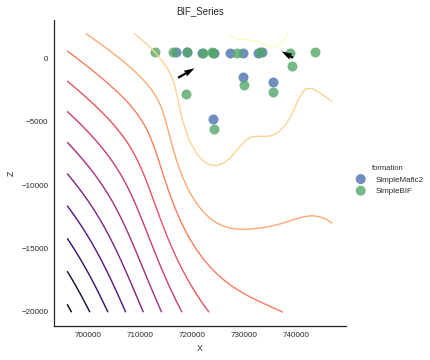

In [12]:
GeMpy.plot_potential_field(geo_data,13, n_pf=1, cmap = "magma",  plot_data = True,
                                        verbose = 5)

###  SImple mafic

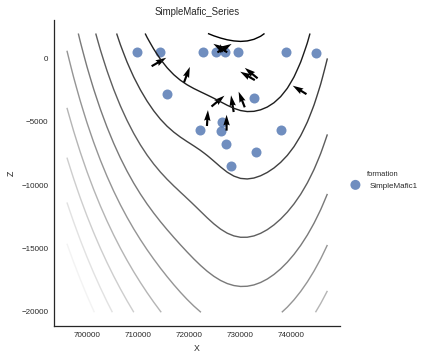

In [13]:
GeMpy.plot_potential_field(geo_data, 10, n_pf=2)

## Optimizing the export of lithologies

But usually the final result we want to get is the final block. The method `compute_block_model` will compute the block model, updating the attribute `block`. This attribute is a theano shared function that can return a 3D array (raveled) using the method `get_value()`.

In [7]:
GeMpy.compute_block_model(geo_data)

../GeMpy/GeMpy.py:38: UserWarning: Using default interpolation values
  warnings.warn('Using default interpolation values')


Final block computed

In [ ]:
#GeMpy.set_interpolator(geo_data, u_grade = 0, compute_potential_field=True)

And again after computing the model in the Plot object we can use the method `plot_block_section` to see a 2D section of the model

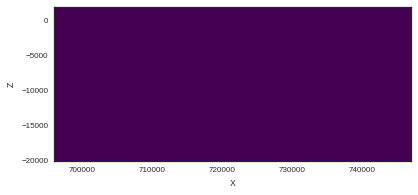

In [8]:
GeMpy.plot_section(geo_data, 13, direction='y')

## Export  to vtk. (*Under development*)

In [14]:
"""Export model to VTK

Export the geology blocks to VTK for visualisation of the entire 3-D model in an
external VTK viewer, e.g. Paraview.

..Note:: Requires pyevtk, available for free on: https://github.com/firedrakeproject/firedrake/tree/master/python/evtk

**Optional keywords**:
    - *vtk_filename* = string : filename of VTK file (default: output_name)
    - *data* = np.array : data array to export to VKT (default: entire block model)
"""
vtk_filename = "noddyFunct2"

extent_x = 10
extent_y = 10
extent_z = 10

delx = 0.2
dely = 0.2
delz = 0.2
from pyevtk.hl import gridToVTK
# Coordinates
x = np.arange(0, extent_x + 0.1*delx, delx, dtype='float64')
y = np.arange(0, extent_y + 0.1*dely, dely, dtype='float64')
z = np.arange(0, extent_z + 0.1*delz, delz, dtype='float64')

# self.block = np.swapaxes(self.block, 0, 2)
gridToVTK(vtk_filename, x, y, z, cellData = {"geology" : sol})

ImportError: No module named 'pyevtk'

## Performance Analysis

One of the advantages of theano is the posibility to create a full profile of the function. This has to be included in at the time of the creation of the function. At the moment it should be active (the downside is larger compilation time and I think also a bit in the computation so be careful if you need a fast call)

### CPU

The following profile is with a 2 core laptop. Nothing spectacular.

Looking at the profile we can see that most of time is in pow operation (exponential). This probably is that the extent is huge and we are doing it with too much precision. I am working on it

### GPU

In [16]:
%%timeit

# Compute the block
GeMpy.compute_block_model(geo_data, [0,1,2], verbose = 0)

1 loop, best of 3: 1.74 s per loop


In [17]:
geo_data.interpolator._interpolate.profile.summary()

Function profiling
  Message: ../GeMpy/DataManagement.py:994
  Time in 3 calls to Function.__call__: 8.400567e-01s
  Time in Function.fn.__call__: 8.395956e-01s (99.945%)
  Time in thunks: 8.275988e-01s (98.517%)
  Total compile time: 3.540267e+00s
    Number of Apply nodes: 342
    Theano Optimizer time: 2.592782e+00s
       Theano validate time: 1.640296e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 8.665011e-01s
       Import time 1.915064e-01s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 72.847s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  57.3%    57.3%       0.474s       2.87e-03s     C      165      55   theano.tensor.elemwise.Elemwise
  10.1%    67.4%       0.084s       2.79e-03s     C       30      10   theano.tensor.blas.Dot22Scalar
   9.6%    77.0%       0.079s       9.81e-04s     C       81      27   theano.sandbox.cuda.basic_ops.HostFromGpu
   6.4%    83.4%       0.05